In [14]:
# Import modules
import numpy as np
import seaborn as sns
import pandas as pd
# Import PySwarms
import pyswarms as ps

from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=15, n_classes=3,
                           n_informative=4, n_redundant=1, n_repeated=2,
                           random_state=1)
%load_ext autoreload
%autoreload 2
%matplotlib inline

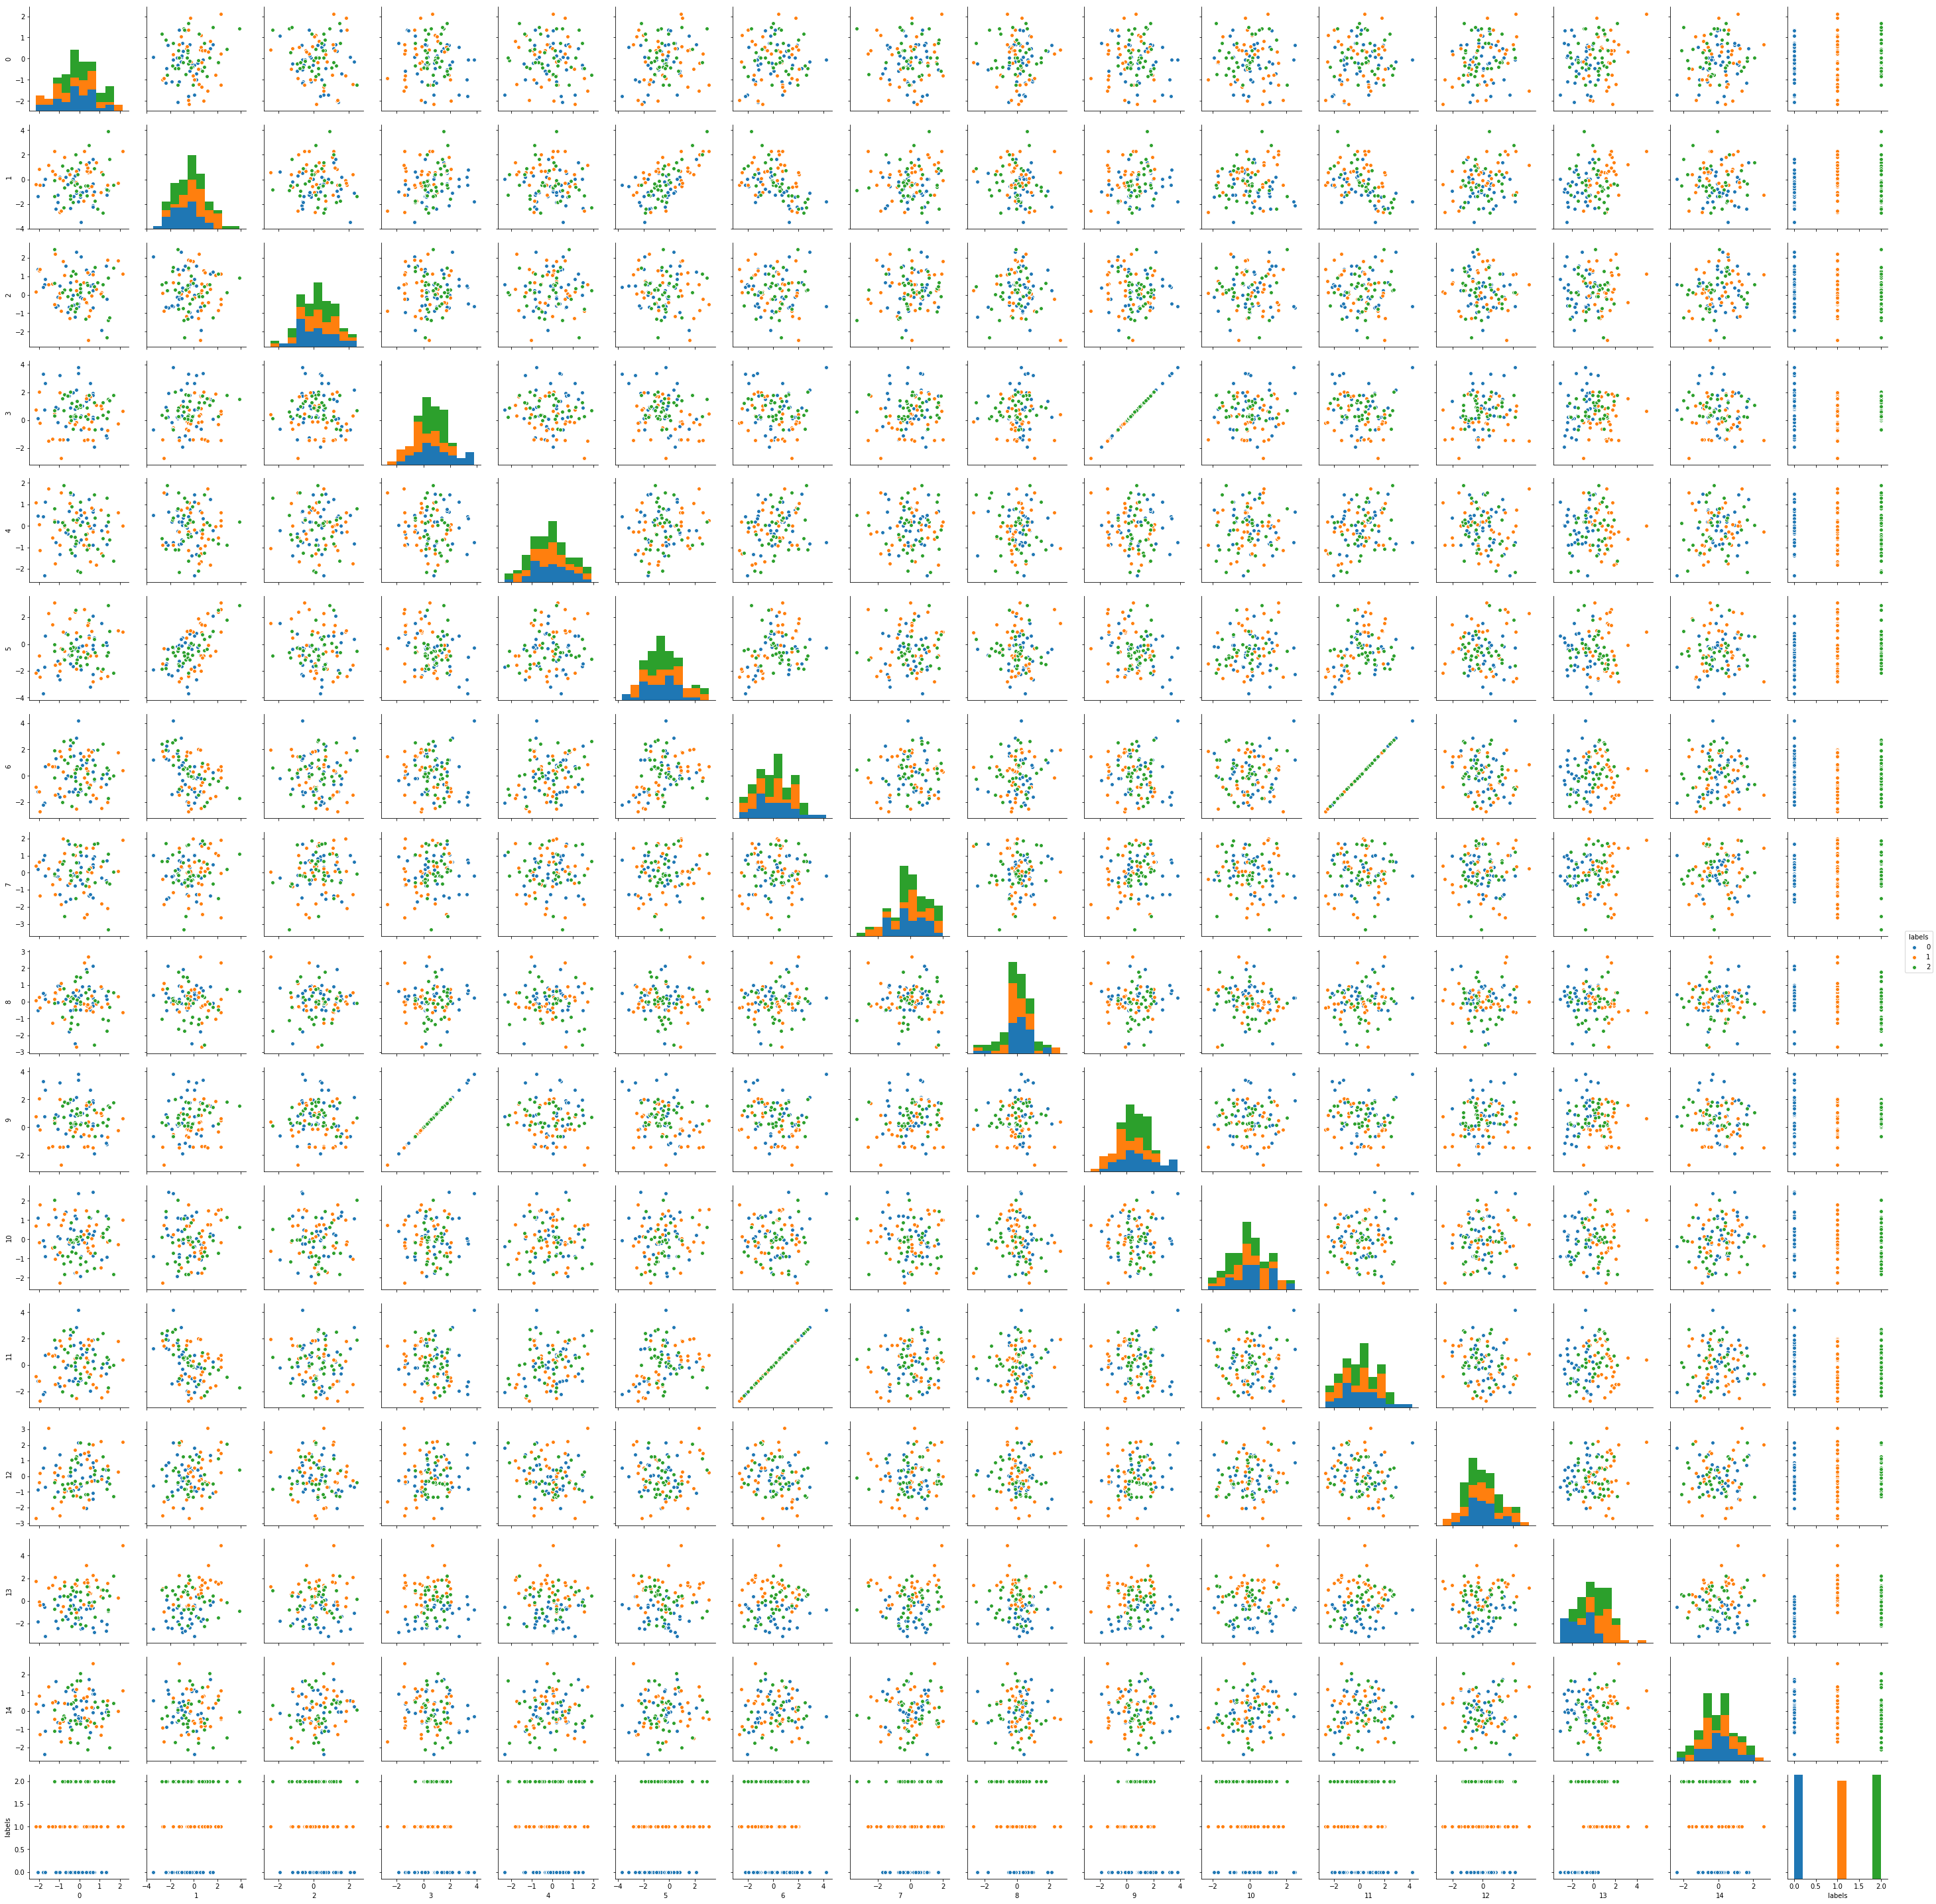

In [15]:
# Plot toy dataset per feature
df = pd.DataFrame(X)
df['labels'] = pd.Series(y)

sns.pairplot(df, hue='labels');

In [16]:
def f(x, alpha=0.88):
    """Higher-level method to do classification in the
    whole swarm.

    Inputs
    ------
    x: numpy.ndarray of shape (n_particles, dimensions)
        The swarm that will perform the search

    Returns
    -------
    numpy.ndarray of shape (n_particles, )
        The computed loss for each particle
    """
    n_particles = x.shape[0]
    j = [f_per_particle(x[i], alpha) for i in range(n_particles)]
    return np.array(j)

In [36]:
from sklearn import linear_model

# Create an instance of the classifier
classifier = linear_model.LogisticRegression()

# Define objective function
def f_per_particle(m, alpha):
    print("m:")
    print(m)
    """Computes for the objective function per particle

    Inputs
    ------
    m : numpy.ndarray
        Binary mask that can be obtained from BinaryPSO, will
        be used to mask features.
    alpha: float (default is 0.5)
        Constant weight for trading-off classifier performance
        and number of features

    Returns
    -------
    numpy.ndarray
        Computed objective function
    """
    total_features = 15
    # Get the subset of the features from the binary mask
    if np.count_nonzero(m) == 0:
        X_subset = X
    else:
        X_subset = X[:,m==1]
    # Perform classification and store performance in P
    classifier.fit(X_subset, y)
    P = (classifier.predict(X_subset) == y).mean()
    # Compute for the objective function
    j = (alpha * (1.0 - P)
        + (1.0 - alpha) * (1 - (X_subset.shape[1] / total_features)))
    print("j")
    print(j)
    return j

In [ ]:
# Initialize swarm, arbitrary
options = {'c1': 0.5, 'c2': 0.5, 'w':0.9, 'k': 10, 'p':2}

# Call instance of PSO
dimensions = 15 # dimensions should be the number of features
optimizer.reset()
optimizer = ps.discrete.BinaryPSO(n_particles=20, dimensions=dimensions, options=options)

# Perform optimization
cost, pos = optimizer.optimize(f, print_step=100, iters=1000, verbose=2)

INFO:pyswarms.discrete.binary:Iteration 1/1000, cost: 0.2784


m:
[0 1 0 1 0 0 0 1 1 1 0 1 1 1 0]
j
0.3024
m:
[0 0 1 1 0 1 1 0 0 1 1 1 0 0 1]
j
0.5224
m:
[0 1 1 0 0 0 0 0 1 0 0 1 0 0 1]
j
0.5464
m:
[1 1 0 1 0 1 1 0 1 0 0 1 0 1 0]
j
0.3112
m:
[0 0 0 1 0 1 0 0 0 1 0 1 1 1 1]
j
0.3192
m:
[0 0 0 1 1 1 1 0 1 0 1 1 1 1 1]
j
0.2864
m:
[0 0 1 0 1 0 0 1 0 1 0 0 1 0 0]
j
0.5464
m:
[1 0 1 1 1 0 1 0 1 0 1 1 1 1 0]
j
0.3216
m:
[1 1 0 0 1 1 0 1 0 1 0 1 0 0 1]
j
0.32
m:
[0 1 0 1 0 0 1 0 1 1 0 0 0 1 1]
j
0.3104
m:
[1 0 0 0 0 1 1 0 0 0 0 1 1 1 0]
j
0.3888
m:
[0 1 0 1 1 1 1 1 0 1 1 1 1 1 0]
j
0.2784
m:
[0 1 0 0 1 0 0 0 0 0 0 0 1 1 1]
j
0.432
m:
[0 0 0 1 0 0 0 1 0 1 0 0 0 1 0]
j
0.3872
m:
[0 0 0 1 1 0 0 0 1 1 1 0 0 1 0]
j
0.3888
m:
[1 1 0 1 0 1 1 1 1 1 0 0 0 0 1]
j
0.3296
m:
[1 1 0 0 0 0 0 0 0 0 0 1 1 0 1]
j
0.5376
m:
[1 0 0 0 0 1 1 0 1 0 0 1 0 0 0]
j
0.5992
m:
[0 1 1 0 1 0 1 0 0 0 0 1 0 1 0]
j
0.4592
m:
[1 1 0 0 1 1 1 1 1 1 0 1 0 1 1]
j
0.296
m:
[0 1 0 1 0 0 0 1 1 1 0 1 1 1 0]
j
0.3024
m:
[0 0 1 1 0 1 1 0 0 1 1 1 0 0 1]
j
0.5224
m:
[0 1 1 0 0 0 0 0 1 0 0 1 0 0 1]
j

j
0.472
m:
[1 0 1 1 1 0 1 1 1 1 0 0 1 1 1]
j
0.2872
m:
[1 0 1 1 1 0 1 1 1 1 0 0 1 0 1]
j
0.568
m:
[1 1 0 1 1 0 1 1 1 1 0 0 1 1 1]
j
0.2696
m:
[1 1 1 1 1 0 1 1 1 1 0 0 1 1 1]
j
0.2616
m:
[1 0 1 1 1 0 1 1 1 1 0 0 1 1 1]
j
0.2872
m:
[1 1 1 1 1 0 1 1 1 1 0 0 1 0 1]
j
0.472
m:
[1 0 1 1 1 0 1 1 1 1 0 0 1 0 1]
j
0.568
m:
[0 0 0 1 0 1 1 1 0 1 0 1 1 1 0]
j
0.2848
m:
[0 0 1 1 0 1 1 1 0 0 0 1 1 1 0]
j
0.276
m:
[0 0 0 1 0 1 1 0 1 1 0 1 1 1 0]
j
0.2848
m:
[0 0 1 1 0 1 1 1 0 1 0 1 1 1 0]
j
0.268
m:
[0 0 1 1 0 1 1 1 0 1 0 1 1 1 0]
j
0.268
m:
[0 0 1 1 0 1 1 1 1 0 0 1 1 1 0]
j
0.2856
m:
[0 1 0 1 0 1 1 1 0 1 0 1 1 1 0]
j
0.2768
m:
[0 0 1 1 0 1 1 1 0 0 0 1 1 1 0]
j
0.276
m:
[0 0 1 1 0 1 1 0 0 1 0 1 1 1 0]
j
0.2848
m:
[1 1 1 1 0 1 0 1 1 1 1 1 1 1 0]
j
0.2704
m:
[0 0 1 1 0 1 1 1 1 1 0 1 1 1 0]
j
0.2776
m:
[0 0 1 1 0 1 1 1 0 1 0 1 1 1 0]
j
0.268
m:
[1 1 1 1 0 1 0 1 1 1 0 1 1 1 0]
j
0.2696
m:
[0 0 1 1 0 1 1 1 1 0 0 1 1 1 0]
j
0.2856
m:
[0 0 1 1 0 1 1 1 1 1 0 1 1 1 0]
j
0.2776
m:
[0 0 1 1 0 1 1 0 0 1 0 1 1 1 

j
0.2784
m:
[1 1 1 1 0 1 1 1 0 1 1 0 1 1 0]
j
0.2872
m:
[0 1 1 1 0 1 1 1 0 1 1 1 1 1 0]
j
0.2784
m:
[0 0 1 1 0 1 1 1 0 1 1 1 1 1 0]
j
0.2952
m:
[0 1 1 1 0 1 1 1 0 1 1 1 1 1 0]
j
0.2784
m:
[0 1 1 1 0 1 1 1 0 1 1 1 1 1 0]
j
0.2784
m:
[1 1 1 1 0 1 1 1 0 1 1 1 1 1 0]
j
0.2792
m:
[0 1 1 1 0 1 1 1 0 1 1 1 1 1 0]
j
0.2784
m:
[1 1 1 1 0 1 1 1 0 1 1 1 1 1 0]
j
0.2792
m:
[1 1 1 1 0 1 1 1 0 1 1 1 1 1 0]
j
0.2792
m:
[0 1 1 1 0 1 1 1 0 1 1 1 1 1 0]
j
0.2784
m:
[1 0 1 1 0 1 1 1 0 1 1 1 1 1 0]
j
0.2784
m:
[1 1 1 1 0 1 1 1 0 1 1 1 1 1 0]
j
0.2792
m:
[0 1 1 1 0 1 1 1 0 1 1 1 1 1 0]
j
0.2784
m:
[0 1 1 1 0 1 1 1 0 1 1 1 1 1 0]
j
0.2784
m:
[0 1 1 1 0 1 1 1 0 1 1 1 1 1 0]
j
0.2784
m:
[1 1 1 1 0 1 1 1 0 1 1 1 1 1 0]
j
0.2792
m:
[0 1 1 1 0 1 1 1 0 1 1 1 1 1 0]
j
0.2784
m:
[0 1 1 1 0 1 1 1 0 1 1 1 1 1 0]
j
0.2784
m:
[0 1 1 1 0 1 1 1 0 1 1 1 1 1 0]
j
0.2784
m:
[0 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2528
m:
[1 1 1 1 1 0 1 1 1 1 0 0 1 1 1]
j
0.2616
m:
[0 1 1 1 1 1 1 1 0 0 0 1 1 1 1]
j
0.2608
m:
[0 0 1 1 0 1 1 1 0 1

j
0.2528
m:
[1 1 1 1 0 1 0 1 0 1 0 1 1 1 1]
j
0.252
m:
[0 1 1 1 1 1 1 1 0 0 0 1 1 1 1]
j
0.2608
m:
[0 1 1 1 0 1 1 1 0 0 0 1 1 1 1]
j
0.2688
m:
[0 1 1 1 1 1 1 1 0 0 0 1 1 1 1]
j
0.2608
m:
[1 1 1 0 1 1 1 1 0 1 0 1 1 1 1]
j
0.2528
m:
[0 1 1 1 1 1 1 1 0 0 0 1 1 1 1]
j
0.2608
m:
[0 1 1 1 0 1 1 1 0 0 0 1 1 1 1]
j
0.2688
m:
[0 1 1 1 1 1 1 1 0 0 0 1 1 1 1]
j
0.2608
m:
[0 1 1 1 0 1 1 1 0 1 0 0 1 1 0]
j
0.268
m:
[0 1 1 1 0 0 1 1 0 1 0 0 1 1 0]
j
0.276
m:
[0 1 1 1 0 0 1 1 0 0 0 0 1 1 0]
j
0.284
m:
[0 0 1 1 0 1 1 1 0 1 0 0 1 1 0]
j
0.276
m:
[0 1 1 1 0 1 1 1 0 1 0 0 1 1 0]
j
0.268
m:
[0 0 1 1 0 1 1 1 0 0 0 0 1 1 0]
j
0.284
m:
[0 1 1 1 0 0 1 1 0 1 0 0 1 1 0]
j
0.276
m:
[0 1 1 1 0 0 1 1 0 0 0 0 1 1 0]
j
0.284
m:
[0 1 1 1 0 1 1 1 0 0 0 0 1 1 0]
j
0.276
m:
[0 1 1 1 0 1 0 1 0 1 0 0 1 1 0]
j
0.276
m:
[0 1 1 1 0 1 1 1 0 0 0 0 1 1 0]
j
0.276
m:
[0 1 1 1 0 1 1 1 0 1 0 0 1 1 0]
j
0.268
m:
[0 1 1 1 0 1 0 1 0 1 0 0 1 1 0]
j
0.276
m:
[0 1 1 1 0 1 1 1 0 0 0 0 1 1 0]
j
0.276
m:
[0 1 1 1 0 1 1 1 0 0 0 0 1 1 0]
j
0

j
0.2688
m:
[0 1 1 1 1 1 1 1 0 0 0 1 1 1 1]
j
0.2608
m:
[1 1 1 0 1 1 1 1 0 1 0 1 1 1 1]
j
0.2528
m:
[0 1 1 1 1 1 1 1 0 0 0 1 1 1 1]
j
0.2608
m:
[0 1 1 1 0 1 1 1 0 0 0 1 1 1 1]
j
0.2688
m:
[0 1 1 1 1 1 1 1 0 0 0 1 1 1 1]
j
0.2608
m:
[1 1 1 1 1 0 0 1 0 1 0 1 1 1 1]
j
0.2608
m:
[1 1 1 1 1 0 0 1 1 1 0 1 1 1 1]
j
0.2616
m:
[1 1 1 1 1 0 0 1 0 1 0 1 1 0 1]
j
0.4096
m:
[1 1 1 1 1 0 0 1 0 1 0 1 1 1 0]
j
0.2688
m:
[1 1 1 1 1 0 0 1 0 1 0 1 1 1 1]
j
0.2608
m:
[1 1 1 1 1 0 0 1 0 1 0 1 1 0 1]
j
0.4096
m:
[1 1 1 1 1 0 0 1 1 1 0 1 1 1 1]
j
0.2616
m:
[1 1 1 1 1 0 0 1 0 1 0 1 1 0 1]
j
0.4096
m:
[1 1 1 1 1 0 0 1 0 1 0 1 1 0 1]
j
0.4096
m:
[1 1 1 1 1 0 0 1 0 1 0 1 1 0 1]
j
0.4096
m:
[1 1 1 1 1 0 0 1 0 1 0 1 1 1 1]
j
0.2608
m:
[1 1 1 1 1 0 0 1 0 1 0 1 1 1 1]
j
0.2608
m:
[1 1 1 1 1 0 0 1 0 1 0 1 1 1 1]
j
0.2608
m:
[1 1 1 1 1 0 0 1 0 1 0 1 1 1 1]
j
0.2608
m:
[1 1 1 1 1 0 0 1 0 1 0 1 1 1 1]
j
0.2608
m:
[1 1 1 1 1 0 0 1 0 1 0 1 1 1 1]
j
0.2608
m:
[1 1 1 0 1 0 0 1 0 1 0 1 1 0 1]
j
0.4176
m:
[1 1 1 1 1 0 0 1 0 1

j
0.2608
m:
[0 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2528
m:
[1 1 1 1 0 1 0 1 0 1 0 1 1 1 1]
j
0.252
m:
[0 1 1 1 1 1 1 1 0 0 0 1 1 1 1]
j
0.2608
m:
[1 1 1 1 1 0 0 1 0 1 0 1 1 1 1]
j
0.2608
m:
[0 1 1 1 1 1 1 1 0 0 0 1 1 1 1]
j
0.2608
m:
[1 1 1 0 1 1 1 1 0 1 0 1 1 1 1]
j
0.2528
m:
[0 1 1 1 1 1 1 1 0 0 0 1 1 1 1]
j
0.2608
m:
[1 1 1 1 1 0 0 1 0 1 0 1 1 1 1]
j
0.2608
m:
[0 1 1 1 1 1 1 1 0 0 0 1 1 1 1]
j
0.2608
m:
[1 1 1 1 1 0 1 1 0 0 0 1 1 1 0]
j
0.2688
m:
[1 1 1 1 1 0 0 1 0 0 0 1 1 1 0]
j
0.2768
m:
[1 1 1 1 1 0 1 1 0 0 0 1 1 1 0]
j
0.2688
m:
[1 1 1 1 1 0 1 1 0 0 0 1 1 1 0]
j
0.2688
m:
[1 1 1 1 1 0 1 1 0 0 0 1 1 1 0]
j
0.2688
m:
[1 1 1 1 1 0 1 1 0 0 0 1 1 1 0]
j
0.2688
m:
[1 1 1 1 1 0 0 1 0 0 0 1 1 1 0]
j
0.2768
m:
[1 1 1 1 1 0 1 1 0 0 0 1 1 1 0]
j
0.2688
m:
[1 1 1 1 1 0 0 1 0 0 0 1 1 1 0]
j
0.2768
m:
[1 1 1 1 1 0 0 1 0 0 0 1 1 1 0]
j
0.2768
m:
[1 1 1 1 1 0 1 1 0 0 0 1 1 1 0]
j
0.2688
m:
[1 1 1 1 1 0 1 1 0 0 0 1 1 1 0]
j
0.2688
m:
[1 1 1 1 0 0 0 1 0 0 0 1 1 1 0]
j
0.2848
m:
[1 1 1 1 1 0 1 1 0 0 

j
0.32
m:
[0 0 1 1 0 1 1 0 0 1 0 1 0 1 1]
j
0.32
m:
[0 0 1 1 0 1 1 0 0 1 0 1 0 1 1]
j
0.32
m:
[0 0 1 1 0 1 1 0 0 1 0 1 0 1 0]
j
0.3016
m:
[0 0 1 1 0 1 1 0 0 1 0 1 0 1 1]
j
0.32
m:
[0 0 1 1 0 1 1 0 0 1 0 1 0 1 1]
j
0.32
m:
[0 0 1 1 0 1 1 0 0 1 0 1 0 1 1]
j
0.32
m:
[0 0 1 0 0 1 1 0 0 1 0 1 0 1 1]
j
0.328
m:
[0 0 1 1 0 1 1 0 0 1 0 1 0 1 1]
j
0.32
m:
[0 0 1 1 0 1 1 0 0 1 0 1 0 1 1]
j
0.32
m:
[0 0 1 1 0 1 1 0 0 1 0 1 0 1 1]
j
0.32
m:
[0 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2528
m:
[1 1 1 1 1 0 1 0 1 0 1 1 1 1 1]
j
0.2528
m:
[0 1 1 1 1 1 1 1 0 0 0 1 1 1 1]
j
0.2608
m:
[1 0 1 1 1 1 1 0 1 0 1 1 1 1 1]
j
0.2528
m:
[0 1 1 1 1 0 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 0 1 1 1 0 0 0 0 1 1 1]
j
0.26
m:
[1 1 1 1 1 0 1 1 1 1 0 1 1 1 1]
j
0.2536
m:
[0 1 1 1 1 1 1 1 0 0 0 1 1 1 1]
j
0.2608
m:
[1 1 1 1 1 1 1 1 0 0 0 1 1 1 1]
j
0.2528
m:
[1 1 1 1 1 1 1 0 1 0 1 1 1 1 1]
j
0.2448
m:
[1 1 1 1 0 1 1 1 0 0 0 1 1 1 1]
j
0.252
m:
[0 1 1 1 1 0 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 0 1 0 1 0 1 0 1 1 1 1]
j
0.252
m:
[

j
0.2608
m:
[1 1 1 1 1 1 1 1 0 0 0 1 1 1 1]
j
0.2528
m:
[1 1 1 1 1 1 1 0 1 0 1 1 1 1 1]
j
0.2448
m:
[1 1 1 1 0 1 1 1 0 0 0 1 1 1 1]
j
0.252
m:
[0 1 1 1 1 0 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 0 1 0 1 0 1 0 1 1 1 1]
j
0.252
m:
[0 1 1 1 1 1 1 1 0 0 0 1 1 1 1]
j
0.2608
m:
[1 1 1 1 1 0 1 1 0 1 0 1 1 1 1]
j
0.2528
m:
[1 1 1 1 0 1 1 1 0 0 0 1 1 1 1]
j
0.252
m:
[1 1 1 0 1 1 1 1 0 1 0 1 1 1 1]
j
0.2528
m:
[0 1 1 1 1 1 1 1 0 0 0 1 1 1 1]
j
0.2608
m:
[0 1 1 1 1 1 1 1 0 1 1 1 1 1 1]
j
0.2536
m:
[0 1 1 1 1 1 1 1 0 0 0 1 1 1 1]
j
0.2608
m:
[0 1 1 1 1 1 1 0 1 1 0 1 0 0 0]
j
0.312
m:
[0 1 1 1 1 1 1 0 1 1 1 1 0 0 0]
j
0.2952
m:
[0 1 1 1 1 1 1 0 1 0 0 1 0 0 0]
j
0.32
m:
[0 1 1 1 1 1 1 0 1 1 1 1 0 0 0]
j
0.2952
m:
[0 1 1 1 1 1 1 0 1 1 0 1 0 0 1]
j
0.2864
m:
[0 1 1 1 0 1 1 0 1 1 0 1 0 0 1]
j
0.3472
m:
[0 1 1 1 1 1 1 0 1 1 0 1 0 0 0]
j
0.312
m:
[0 1 1 1 1 1 1 0 1 0 0 1 0 0 0]
j
0.32
m:
[0 1 1 1 1 1 1 0 1 0 0 1 0 0 0]
j
0.32
m:
[0 1 1 1 1 1 1 0 1 1 1 1 0 0 1]
j
0.3048
m:
[0 1 1 1 0 1 1 0 1 1 0 1 0 0 1]


0.3304
m:
[0 0 1 1 0 1 0 0 0 0 1 1 1 1 1]
j
0.3112
m:
[0 0 1 1 0 1 0 1 0 0 1 1 1 1 1]
j
0.312
m:
[0 1 1 1 0 1 0 0 1 0 1 1 1 1 1]
j
0.3392
m:
[0 0 1 1 0 1 0 1 0 0 1 1 1 1 1]
j
0.312
m:
[0 1 1 1 0 1 0 1 0 0 1 1 1 1 1]
j
0.304
m:
[0 0 1 1 0 1 0 1 0 0 1 1 1 1 1]
j
0.312
m:
[0 0 1 1 0 1 0 0 0 0 1 1 1 1 1]
j
0.3112
m:
[0 0 0 1 0 1 0 0 0 0 1 1 1 1 1]
j
0.3192
m:
[0 0 1 1 0 1 0 1 0 0 1 1 1 1 1]
j
0.312
m:
[0 0 1 0 0 1 0 1 0 0 1 1 1 1 1]
j
0.3728
m:
[0 0 1 1 0 1 0 0 0 0 1 1 1 1 1]
j
0.3112
m:
[0 0 1 1 0 1 0 0 0 0 1 1 1 0 1]
j
0.5128
m:
[0 0 0 1 0 1 0 1 0 0 1 1 1 1 1]
j
0.3112
m:
[0 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2528
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[0 1 1 1 1 1 1 1 0 0 0 1 1 1 1]
j
0.2608
m:
[1 0 0 1 1 1 1 0 1 1 1 0 1 1 1]
j
0.252
m:
[0 1 1 1 1 0 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 0 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 0 1 1 1 1 0 1 1 1 1]
j
0.2536
m:
[1 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.2528
m:
[1 1 1 1 1 1 1 1 0 0 0 1 1 1 1]
j
0.2528
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1

j
0.2528
m:
[1 1 1 1 0 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[0 1 1 1 1 1 1 1 0 0 0 1 1 1 1]
j
0.2608
m:
[0 0 1 1 1 1 1 1 0 1 0 0 1 1 0]
j
0.2856
m:
[0 0 1 0 1 1 1 0 0 1 1 1 1 1 0]
j
0.3032
m:
[0 0 1 0 1 1 1 1 0 1 0 0 1 1 0]
j
0.2936
m:
[0 0 1 0 1 1 1 0 0 1 1 0 1 1 0]
j
0.3112
m:
[0 0 1 0 1 0 1 1 0 1 0 1 1 1 0]
j
0.3376
m:
[0 0 1 0 0 1 1 1 0 1 0 1 1 1 0]
j
0.276
m:
[0 0 1 0 1 1 1 1 0 1 0 1 1 1 0]
j
0.2856
m:
[0 0 1 0 1 1 1 1 0 1 0 1 1 1 0]
j
0.2856
m:
[0 0 1 0 1 1 1 1 0 1 0 1 1 1 0]
j
0.2856
m:
[0 0 1 0 1 1 1 0 0 1 1 1 1 1 0]
j
0.3032
m:
[0 0 1 0 0 1 1 1 0 1 1 1 1 1 0]
j
0.3032
m:
[0 0 1 0 1 1 1 1 0 1 0 1 1 1 0]
j
0.2856
m:
[0 0 1 0 0 1 1 1 0 1 0 1 1 1 0]
j
0.276
m:
[0 0 1 0 1 1 1 1 0 1 0 1 1 1 0]
j
0.2856
m:
[0 0 1 1 1 1 1 1 0 1 1 1 1 1 0]
j
0.2784
m:
[0 0 1 0 0 1 1 1 0 1 1 1 1 1 0]
j
0.3032
m:
[0 0 1 0 1 1 1 1 0 1 1 0 1 1 0]
j
0.2944
m:
[0 0 1 0 1 1 1 0 0 1 0 1 1 1 0]
j
0.3024
m:
[0 0 1 0 1 1 1 1 0 1 0 1 1 1 0]
j
0.2856
m:
[0 0 1 0 1 1 1 1 0 1 0 1

m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 1 0 0 0 1 1 1 1]
j
0.252
m:
[0 1 1 1 1 0 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 0 1 0 1 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.2528
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 0 1 1 1 0 0 0 1 1 1 1]
j
0.252
m:
[1 1 1 0 1 1 1 1 0 1 0 1 1 1 1]
j
0.2528
m:
[1 1 1 1 0 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[0 1 1 1 1 1 1 1 0 0 0 1 1 1 1]
j
0.2608
m:
[1 1 1 1 0 1 0 1 0 1 0 1 0 1 1]
j
0.2864
m:
[1 1 1 1 0 0 0 0 0 1 0 1 0 1 1]
j
0.32
m:
[1 1 1 1 0 1 0 1 0 1 0 1 0 1 1]
j
0.2864
m:
[1 0 1 1 0 1 0 0 1 1 0 0 0 1 1]
j
0.364
m:
[1 1 1 1 0 0 0 1 0 1 0 1 0 1 1]
j
0.2944
m:
[1 1 1 1 0 1 0 1 0 1 0 1 0 1 1]
j
0.2864
m:
[1 1 1 0 0 1 0 1 1 1 0 1 0 1 1]
j
0.3128
m:
[1 1 1 1 0 1 0 1 0 1 0 1 0 1 1]
j
0.2864
m:
[1 1 1 1 0 1 0 1 0 1 0 1 0 1 1]
j
0.2864
m:
[1 0 1 1 0 1 0 1 1 1 0 1 0 1 1]
j
0.3128
m:
[1 1 1 1 0 1 0 1 0 1 0 1 0 1 1]
j
0.2864
m:
[1 1 1 1 0 0 0 1 0 1 0 1 0 1 1]
j
0.294

m:
[0 1 0 1 1 1 1 1 0 1 0 1 0 0 1]
j
0.2856
m:
[1 1 0 1 1 1 1 1 0 1 0 1 0 0 1]
j
0.3128
m:
[0 1 0 1 1 1 1 1 0 1 0 1 0 0 1]
j
0.2856
m:
[0 1 0 1 1 1 1 1 0 1 0 1 0 0 1]
j
0.2856
m:
[0 1 0 1 1 1 1 1 0 1 0 1 0 0 1]
j
0.2856
m:
[0 1 0 1 1 1 1 1 0 1 0 1 0 0 1]
j
0.2856
m:
[0 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2528
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[0 1 1 1 1 1 1 1 0 0 0 1 1 1 1]
j
0.2608
m:
[1 0 0 1 1 1 1 0 1 1 1 0 1 1 1]
j
0.252
m:
[0 1 1 1 1 0 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 0 1 1 1 0 1 1 1 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]
j
0.2456
m:
[1 1 1 1 1 1 1 1 0 0 0 1 1 1 1]
j
0.2528
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
j
0.2376
m:
[0 1 1 1 1 0 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]
j
0.2456
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 0 1 1 1 0 0 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
j


INFO:pyswarms.discrete.binary:Iteration 101/1000, cost: 0.2368


j
0.2536
m:
[1 1 0 1 0 1 0 0 1 1 0 1 1 1 1]
j
0.2776
m:
[1 1 0 1 1 1 0 0 1 1 0 1 1 1 1]
j
0.2608
m:
[1 1 1 0 0 1 0 0 1 1 0 1 1 1 1]
j
0.2952
m:
[1 1 0 1 0 1 0 1 1 1 0 1 1 1 1]
j
0.2696
m:
[1 1 0 1 0 1 0 0 1 1 0 1 1 1 1]
j
0.2776
m:
[1 1 0 1 0 1 0 0 1 1 0 1 1 1 1]
j
0.2776
m:
[1 1 0 1 0 1 0 0 0 0 0 1 1 1 1]
j
0.276
m:
[0 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2528
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[0 1 1 1 1 1 1 1 0 0 0 1 1 1 1]
j
0.2608
m:
[1 0 0 1 1 1 1 0 1 1 1 0 1 1 1]
j
0.252
m:
[0 1 1 1 1 0 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 0 1 1 1 0 1 1 1 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]
j
0.2456
m:
[1 1 1 1 1 1 1 1 0 0 0 1 1 1 1]
j
0.2528
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
j
0.2376
m:
[0 1 1 1 1 0 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]
j
0.2456
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 0 1 1 1 0 0 0 1 

[1 1 1 0 1 1 1 0 1 1 1 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]
j
0.2456
m:
[1 1 1 1 1 1 1 1 0 0 0 1 1 1 1]
j
0.2528
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
j
0.2376
m:
[0 1 1 1 1 0 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]
j
0.2456
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 0 1 1 1 0 0 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
j
0.2376
m:
[1 1 1 1 0 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[0 1 1 1 1 1 1 1 0 0 0 1 1 1 1]
j
0.2608
m:
[0 1 1 1 0 1 1 0 0 0 0 0 1 0 1]
j
0.3368
m:
[0 1 1 1 0 1 1 0 0 0 0 0 1 0 1]
j
0.3368
m:
[0 1 1 1 0 1 1 0 0 0 0 0 1 1 1]
j
0.3112
m:
[0 1 1 1 0 1 1 0 0 0 0 0 0 0 1]
j
0.3536
m:
[0 1 1 1 0 0 1 0 0 0 0 0 1 0 1]
j
0.468
m:
[0 1 1 1 0 1 1 0 0 0 0 0 1 0 1]
j
0.3368
m:
[0 1 1 0 0 1 1 0 0 0 0 0 1 0 1]
j
0.5208
m:
[0 1 1 1 0 1 0 0 0 0 0 0 1 0 1]
j
0.5208
m:
[0 1 1 1 0 1 1 0 0 0 0 0 1 0 1]
j
0.33

j
0.2368
m:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
j
0.2376
m:
[0 1 1 1 1 0 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]
j
0.2456
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 0 1 1 1 0 0 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
j
0.2376
m:
[1 1 1 1 0 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[1 0 1 1 1 0 0 0 1 1 0 1 0 0 1]
j
0.5752
m:
[1 0 1 1 1 0 1 0 1 1 1 1 0 0 1]
j
0.5064
m:
[1 0 1 1 1 0 0 0 1 0 0 1 0 0 0]
j
0.6264
m:
[1 0 1 1 1 0 0 0 1 1 0 1 0 0 0]
j
0.6184
m:
[1 0 1 1 1 0 0 0 1 1 0 1 0 0 0]
j
0.6184
m:
[1 0 1 1 1 0 0 0 1 1 1 1 0 0 1]
j
0.5144
m:
[1 0 1 1 1 0 0 0 1 1 0 1 0 0 1]
j
0.5752
m:
[1 0 1 1 1 0 0 0 1 1 1 1 0 0 1]
j
0.5144
m:
[1 0 1 1 1 0 1 0 1 0 0 1 1 0 0]
j
0.584
m:
[1 0 1 1 1 0 1 0 1 1 1 1 0 0 1]
j
0.5064
m:
[1 0 1 1 1 0 0 0 1 1 1 1 0 0 1]
j
0.5144
m:
[1 0 1 1 1 0 0 0 1 1 0 1 1 0 1]
j
0.5672
m:
[1 0 1 1 1 0 0 0 1 1 1 1 0 

j
0.2768
m:
[1 1 0 1 1 0 0 1 0 1 0 1 1 1 1]
j
0.2688
m:
[0 1 1 1 1 0 0 1 0 0 0 1 1 1 1]
j
0.2768
m:
[1 1 0 1 1 0 0 1 1 1 0 1 1 1 1]
j
0.2696
m:
[0 1 1 1 1 0 0 1 0 1 0 1 1 1 1]
j
0.2688
m:
[1 1 1 1 1 0 0 1 1 1 0 1 1 1 1]
j
0.2616
m:
[0 1 0 1 1 0 0 1 0 1 0 1 1 1 1]
j
0.2768
m:
[1 1 0 1 1 0 0 1 0 1 0 1 1 1 1]
j
0.2688
m:
[1 1 1 1 1 0 0 1 0 0 0 1 1 1 1]
j
0.2688
m:
[1 1 0 1 1 0 0 1 1 1 0 1 1 1 1]
j
0.2696
m:
[1 1 1 1 1 0 0 1 0 1 0 1 1 1 1]
j
0.2608
m:
[0 1 0 1 1 0 0 1 0 1 0 1 1 1 1]
j
0.2768
m:
[1 1 1 1 1 0 0 1 0 1 0 1 1 1 1]
j
0.2608
m:
[1 1 0 1 1 0 0 1 0 1 0 1 1 1 1]
j
0.2688
m:
[0 1 1 1 1 0 0 1 0 1 0 1 1 1 1]
j
0.2688
m:
[1 1 0 1 1 0 0 1 0 0 0 1 1 1 1]
j
0.2768
m:
[1 1 0 1 1 0 0 1 1 1 0 1 1 1 1]
j
0.2696
m:
[1 1 0 1 1 0 0 1 0 1 0 1 1 1 1]
j
0.2688
m:
[0 1 1 1 1 0 0 1 0 1 0 1 1 1 1]
j
0.2688
m:
[0 1 1 1 1 0 0 1 0 1 0 1 1 1 1]
j
0.2688
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[0 1 1 1 1 1 1 1 0 0 0 1 1 1 1]
j
0.2608
m:
[1 0 0 1 1 1 1 0 1 1 

j
0.2704
m:
[0 1 1 1 1 1 1 0 1 1 0 1 1 1 1]
j
0.2704
m:
[0 1 1 1 1 1 1 0 1 1 0 1 1 1 1]
j
0.2704
m:
[0 1 1 0 0 1 1 0 1 1 0 1 1 1 1]
j
0.2864
m:
[0 1 1 1 0 1 1 0 1 1 0 1 1 1 1]
j
0.2872
m:
[0 1 1 1 1 1 1 1 1 1 0 1 1 1 1]
j
0.2536
m:
[0 1 1 1 1 1 1 0 1 1 0 1 1 1 1]
j
0.2704
m:
[0 1 1 1 1 1 1 0 1 0 0 1 1 1 1]
j
0.296
m:
[0 1 1 1 0 1 1 0 1 1 0 1 1 1 1]
j
0.2872
m:
[0 1 1 1 1 1 1 0 1 1 0 1 0 1 1]
j
0.296
m:
[0 1 1 1 0 1 1 0 1 1 0 1 1 1 1]
j
0.2872
m:
[0 1 1 1 1 1 1 0 1 1 0 1 1 1 1]
j
0.2704
m:
[0 1 1 1 0 1 1 0 1 0 0 1 1 1 1]
j
0.2864
m:
[0 1 1 1 1 1 1 0 1 1 0 1 1 1 1]
j
0.2704
m:
[0 1 1 1 0 1 1 0 1 1 0 1 1 1 1]
j
0.2872
m:
[0 1 1 1 0 1 1 0 1 1 0 1 0 1 1]
j
0.2864
m:
[0 1 1 1 0 1 1 0 1 1 0 1 1 1 1]
j
0.2872
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[0 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2528
m:
[1 1 1 1 1 1 1 0 1 1 1 0 1 1 1]
j
0.2448
m:
[0 1 1 1 1 0 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 0 1 1 1 0 1 1 1 1

m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[0 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2528
m:
[1 1 1 1 1 1 1 0 1 1 1 0 1 1 1]
j
0.2448
m:
[0 1 1 1 1 0 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 0 1 1 1 0 1 1 1 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
j
0.2376
m:
[0 1 1 1 1 0 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
j
0.2376
m:
[1 1 1 1 0 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[0 1 1 1 0 1 1 0 1 1 0 1 1 1 1]
j
0.2872
m:
[0 0 1 1 0 1 1 0 1 1 0 1 1 1 1]
j
0.2688
m:
[0 0 1 1 0 1 1 0 1 1 0 1 1 1 1]
j
0.2688
m:
[0 1 1 1 0 1 1 0 1 1 0 1 1 1 1]
j
0

m:
[1 1 1 0 1 1 0 1 0 0 0 1 0 0 0]
j
0.504
m:
[1 0 1 0 1 1 0 1 0 0 1 1 0 0 0]
j
0.5744
m:
[0 1 1 0 1 1 0 1 0 0 1 1 0 0 0]
j
0.5304
m:
[0 1 1 0 1 0 0 1 0 0 1 1 0 0 0]
j
0.5472
m:
[0 1 1 0 1 1 0 1 0 0 1 1 0 0 0]
j
0.5304
m:
[0 0 1 0 0 1 0 1 0 0 1 1 0 0 0]
j
0.5992
m:
[0 1 1 0 1 1 0 1 0 0 0 1 0 0 0]
j
0.5208
m:
[0 1 1 0 0 1 0 1 0 0 0 1 0 0 0]
j
0.5288
m:
[0 1 1 0 1 1 0 1 0 0 1 1 0 0 0]
j
0.5304
m:
[0 1 1 0 0 1 0 1 0 0 0 1 0 0 0]
j
0.5288
m:
[0 1 1 0 1 1 0 1 0 0 0 1 0 0 0]
j
0.5208
m:
[0 1 1 0 0 1 0 1 0 0 0 1 0 0 0]
j
0.5288
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[0 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2528
m:
[1 1 1 1 1 1 1 0 1 1 1 0 1 1 1]
j
0.2448
m:
[0 1 1 1 1 0 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 0 1 1 1 0 1 1 1 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


[1 1 1 0 1 1 1 1 0 0 0 1 1 0 1]
j
0.5064
m:
[1 1 1 0 1 1 1 1 0 1 0 1 1 1 1]
j
0.2528
m:
[1 1 1 0 1 1 1 1 0 1 0 1 1 1 1]
j
0.2528
m:
[1 1 1 0 1 1 1 1 0 0 0 1 1 0 1]
j
0.5064
m:
[1 1 1 0 1 1 1 1 0 0 0 1 1 0 1]
j
0.5064
m:
[1 1 1 0 1 1 1 1 0 1 0 1 1 0 1]
j
0.3048
m:
[1 1 1 0 1 1 1 1 0 1 0 1 1 0 1]
j
0.3048
m:
[1 1 1 0 1 1 1 1 0 0 0 1 1 0 1]
j
0.5064
m:
[1 1 1 0 1 1 1 1 0 0 0 1 1 1 1]
j
0.2872
m:
[1 1 1 0 1 1 1 1 0 0 0 1 1 0 1]
j
0.5064
m:
[1 1 1 0 1 1 1 1 0 1 0 1 1 1 1]
j
0.2528
m:
[1 1 1 0 1 1 1 1 0 1 0 1 1 0 1]
j
0.3048
m:
[1 1 1 0 0 1 1 1 0 1 0 1 1 0 1]
j
0.3128
m:
[1 1 1 0 1 1 1 1 0 0 0 1 1 0 1]
j
0.5064
m:
[1 1 1 0 1 1 1 1 0 0 0 1 1 1 1]
j
0.2872
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 0 1 1 1 0 1 1 1]
j
0.2448
m:
[0 1 1 1 1 0 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 0 1 1 1 0 1 1 1 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0

0.3032
m:
[0 1 1 1 0 1 1 0 0 0 0 1 1 1 1]
j
0.3032
m:
[0 1 1 1 0 1 1 0 1 0 0 1 0 1 1]
j
0.3032
m:
[0 1 1 1 0 1 1 0 0 0 0 1 1 1 1]
j
0.3032
m:
[0 1 1 1 0 1 1 0 0 0 0 1 0 1 1]
j
0.32
m:
[0 1 1 0 0 1 1 0 1 0 0 1 1 1 1]
j
0.312
m:
[1 1 1 1 0 1 1 0 0 0 0 1 1 1 1]
j
0.26
m:
[0 1 1 1 0 1 1 1 0 0 0 1 1 1 1]
j
0.2688
m:
[1 1 1 1 0 1 1 0 0 0 0 1 1 1 1]
j
0.26
m:
[1 1 1 1 0 1 1 1 0 0 0 1 1 1 1]
j
0.252
m:
[0 1 1 1 0 1 1 0 0 0 0 1 1 1 1]
j
0.3032
m:
[1 1 1 1 0 1 1 0 0 0 0 1 1 1 1]
j
0.26
m:
[1 1 1 1 0 1 0 0 0 0 0 1 0 1 1]
j
0.32
m:
[0 1 1 1 0 1 1 0 0 0 0 1 0 1 1]
j
0.32
m:
[1 1 1 1 0 1 1 0 0 0 0 1 1 1 1]
j
0.26
m:
[0 1 1 1 0 1 1 0 0 0 0 1 1 1 1]
j
0.3032
m:
[1 1 1 1 0 1 1 0 0 0 0 1 1 1 1]
j
0.26
m:
[0 1 1 1 0 1 1 0 0 0 0 1 1 1 1]
j
0.3032
m:
[0 1 1 1 0 1 1 0 0 0 0 1 1 1 1]
j
0.3032
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 0 1 1 1 0 1 1 1]
j
0.2448
m:
[0 1 1 1 1 0 1 1 0 1 0 1 1 1 1]
j
0.252
m:

j
0.2448
m:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
j
0.2376
m:
[1 1 1 1 0 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 0 0 0 0 0 1 0 1 1 1 1]
j
0.268
m:
[1 1 0 1 1 0 1 0 0 1 0 1 1 1 1]
j
0.2688
m:
[1 1 0 1 0 0 1 0 0 1 0 1 1 1 1]
j
0.268
m:
[1 1 1 1 1 0 0 0 0 1 0 1 1 1 1]
j
0.2688
m:
[1 1 1 1 1 0 1 1 0 1 0 1 1 1 1]
j
0.2528
m:
[1 1 0 1 1 0 0 0 0 1 0 1 1 1 1]
j
0.2768
m:
[1 1 0 1 1 0 0 0 0 1 0 1 1 1 1]
j
0.2768
m:
[1 1 1 1 0 0 0 1 0 1 0 1 1 1 1]
j
0.26
m:
[1 1 1 1 1 0 0 1 0 1 0 1 1 1 1]
j
0.2608
m:
[1 1 0 1 0 0 1 0 0 1 0 1 1 1 1]
j
0.268
m:
[1 1 1 1 1 0 1 0 0 1 0 1 1 1 1]
j
0.2608
m:
[1 1 0 1 1 0 1 1 0 1 0 1 1 1 1]
j
0.2608
m:
[1 1 0 1 1 0 1 0 0 1 0 1 1 1 1]
j
0.2688
m:
[1 1 1 1 1 0 1 0 0 1 0 1 1 1 1]
j
0.2608
m:
[1 1 0 1 0 0 1 0 0 1 0 1 1 1 1]
j
0.268
m:
[1 1 1 1 1 0 1 1 0 1 0 1 1 1 1]
j
0.2528
m:
[1 1 0 1 0 0 1 1 0 1 0 1 1 1 1]
j
0.26
m:
[1 1 0 1 0 0 0 0 0 1 0 1 1 1 1]
j
0.276
m:
[1 1 0 1 1 0 0 0 0 1 0 1 1 1 1]


j
0.252
m:
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
j
0.2376
m:
[1 1 1 1 0 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[0 1 1 0 1 1 1 0 0 1 0 0 1 1 1]
j
0.2768
m:
[0 1 1 0 1 1 1 0 0 1 0 0 1 1 1]
j
0.2768
m:
[0 1 1 0 1 1 1 0 0 1 0 0 1 1 1]
j
0.2768
m:
[0 1 1 0 1 1 1 0 0 1 0 0 1 1 1]
j
0.2768
m:
[0 1 1 0 1 1 1 0 0 1 0 0 1 1 1]
j
0.2768
m:
[0 1 1 0 1 1 1 0 0 1 0 0 1 1 1]
j
0.2768
m:
[0 1 1 0 1 1 1 0 0 1 0 0 1 1 1]
j
0.2768
m:
[0 1 1 0 1 1 1 0 0 1 0 0 1 1 1]
j
0.2768
m:
[0 1 1 0 1 1 1 0 0 1 0 0 1 1 1]
j
0.2768
m:
[0 1 1 0 1 1 1 0 0 1 0 0 1 1 1]
j
0.2768
m:
[0 1 1 0 1 1 1 0 0 1 0 0 1 1 1]
j
0.2768
m:
[0 1 1 0 1 1 1 0 0 1 0 0 1 1 1]
j
0.2768
m:
[0 1 1 0 1 1 1 0 0 1 0 0 1 1 1]
j
0.2768
m:
[0 1 1 0 1 1 1 0 0 1 0 0 1 1 1]
j
0.2768
m:
[0 1 1 0 1 1 1 0 0 1 0 0 1 1 1]
j
0.2768
m:
[0 1 1 0 1 1 1 0 0 1 0 0 1 1 1]
j
0.2768
m:
[0 1 1 0 1 1 1 0 0 1 0 0 1 1 1]
j
0.2768
m:
[0 1 1 0 1 1 1 0 0 1 0 0

[1 0 0 1 0 0 1 0 1 0 1 0 1 0 1]
j
0.548
m:
[1 0 0 1 0 0 1 1 1 0 0 1 1 0 1]
j
0.5752
m:
[1 0 0 1 0 0 1 0 1 0 1 1 1 0 1]
j
0.5488
m:
[1 0 1 1 0 0 1 1 1 0 1 1 1 0 1]
j
0.4888
m:
[1 0 1 1 0 0 1 1 1 0 0 1 1 0 1]
j
0.5672
m:
[1 1 1 1 0 0 1 1 1 0 0 1 1 0 1]
j
0.4976
m:
[1 0 1 1 0 0 1 1 1 0 1 1 1 0 1]
j
0.4888
m:
[1 0 0 1 0 0 1 1 1 0 1 1 1 0 1]
j
0.4968
m:
[1 0 0 1 0 0 1 1 1 0 0 1 1 0 1]
j
0.5752
m:
[1 0 0 1 0 0 1 1 1 0 0 1 1 0 1]
j
0.5752
m:
[1 0 1 1 0 0 1 1 1 0 1 1 0 0 1]
j
0.5144
m:
[1 0 0 1 0 0 1 1 1 0 0 1 1 0 1]
j
0.5752
m:
[1 0 1 1 0 0 1 1 1 0 0 1 1 0 1]
j
0.5672
m:
[1 0 0 1 0 0 1 1 1 0 1 1 1 0 1]
j
0.4968
m:
[1 1 0 1 0 0 1 0 1 0 0 1 1 0 1]
j
0.5136
m:
[1 0 0 1 0 0 1 1 1 0 0 1 1 0 1]
j
0.5752
m:
[1 0 1 1 0 0 1 0 1 0 0 1 1 0 1]
j
0.5752
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 0 1 1 1 0 1 1 1]
j
0.2448
m:
[0 1 1 1 1 0 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.

INFO:pyswarms.discrete.binary:Iteration 201/1000, cost: 0.2368


j
0.2368
m:
[1 1 1 1 0 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 0 1 1 1 0 1 1 1]
j
0.2448
m:
[0 1 1 1 1 0 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 0 1 1 1 0 1 1 1 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
j
0.2376
m:
[0 1 1 1 1 0 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[0 1 1 1 1 1 1 0 0 0 0 1 1 0 1]
j
0.3208
m:
[0 1 0 1 1 1 1 0 0 0 0 1 1 0 0]
j
0.3192
m:
[0 1 1 1 1 1 1 0 0 0 0 1 1 0 1]
j
0.3208
m:
[0 1 1 1 1 1 1 0 0 0 0 0 1 1 0]
j
0.3024
m:
[0 1 0 1 1 1 1 0 0 0 0 1 1 

0.2704
m:
[1 1 0 1 1 1 1 0 1 1 1 1 1 0 1]
j
0.3056
m:
[1 1 0 1 1 1 1 0 1 1 1 1 1 0 1]
j
0.3056
m:
[1 1 0 1 1 1 1 0 1 1 1 1 1 0 1]
j
0.3056
m:
[0 1 0 1 1 1 1 0 1 1 1 1 1 0 1]
j
0.3224
m:
[0 1 0 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2704
m:
[0 1 0 1 1 1 1 0 1 1 1 1 1 0 1]
j
0.3224
m:
[1 1 0 1 1 1 1 0 1 1 1 1 1 0 1]
j
0.3056
m:
[0 1 0 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2704
m:
[0 1 0 1 1 1 1 0 1 1 1 1 1 0 1]
j
0.3224
m:
[1 1 0 1 1 1 1 0 1 1 1 1 1 0 1]
j
0.3056
m:
[0 1 0 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2704
m:
[0 1 0 1 1 1 1 0 1 1 1 1 1 0 1]
j
0.3224
m:
[0 1 0 1 1 1 1 0 1 1 1 1 1 0 1]
j
0.3224
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 0 1 1 1 0 1 1 1]
j
0.2448
m:
[0 1 1 1 1 0 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 0 1 1 1 0 1 1 1 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 0 1 1 1 1 

m:
[1 1 1 1 1 1 1 0 0 1 0 1 0 1 1]
j
0.3048
m:
[1 1 1 1 1 1 1 0 0 1 0 1 0 1 1]
j
0.3048
m:
[1 1 1 1 1 1 1 0 0 1 0 1 0 1 1]
j
0.3048
m:
[1 1 1 1 1 1 1 0 0 1 0 1 0 1 1]
j
0.3048
m:
[1 1 1 1 1 0 1 0 0 1 0 1 0 1 1]
j
0.3128
m:
[1 1 1 1 1 1 1 0 0 1 0 1 0 1 1]
j
0.3048
m:
[1 1 1 1 1 1 1 0 0 1 0 1 0 1 1]
j
0.3048
m:
[0 1 1 1 1 1 1 0 0 1 0 1 0 1 1]
j
0.2952
m:
[1 1 1 1 1 1 1 0 0 1 0 1 0 1 1]
j
0.3048
m:
[1 1 1 1 1 1 1 0 1 1 0 1 0 1 1]
j
0.3056
m:
[1 1 1 1 1 1 1 0 0 1 0 1 0 1 1]
j
0.3048
m:
[0 1 1 1 1 1 1 0 0 1 0 1 0 1 1]
j
0.2952
m:
[0 1 1 1 1 1 1 0 0 1 0 1 0 1 1]
j
0.2952
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 0 1 1 1]
j
0.2448
m:
[0 1 1 1 1 0 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]

j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[0 1 1 1 0 0 1 1 0 1 0 1 1 1 0]
j
0.268
m:
[0 1 1 1 0 0 1 1 0 1 1 1 1 1 0]
j
0.2864
m:
[0 1 1 1 0 0 1 1 0 1 1 1 1 1 0]
j
0.2864
m:
[0 1 1 1 0 0 1 1 0 1 1 1 1 1 0]
j
0.2864
m:
[0 1 1 1 0 0 1 1 0 1 0 1 1 1 0]
j
0.268
m:
[0 1 1 1 0 0 1 1 0 1 1 1 1 1 0]
j
0.2864
m:
[0 1 1 1 0 0 1 1 0 1 1 1 1 1 0]
j
0.2864
m:
[0 1 1 1 0 0 1 1 0 1 1 1 1 1 0]
j
0.2864
m:
[0 1 1 1 0 0 1 1 0 1 0 1 1 1 0]
j
0.268
m:
[0 1 1 1 0 0 1 1 0 1 1 1 1 1 0]
j
0.2864
m:
[0 1 1 1 0 0 1 1 0 1 1 1 1 1 0]
j
0.2864
m:
[0 1 1 1 0 0 1 1 0 1 0 1 1 1 0]
j
0.268
m:
[0 1 1 1 0 0 1 1 0 1 0 1 1 1 0]
j
0.268
m:
[0 1 1 1 0 0 1 1 0 1 1 1 1 1 0]
j
0.2864
m:
[0 1 1 1 0 0 1 1 0 1 0 1 1 1 0]
j
0.268
m:
[0 1 1 1 0 0 1 1 0 1 1 1 1 1 0]
j
0.2864
m:
[0 1 1 1 0 0 1 1 0 1 1 1 1 1 0]
j
0.2864
m:
[0 1 1 1 0 0 1 1 0 1 1 1 1 1 0]
j
0.2864
m:
[0 1 1 1 0 0 1 1 0 1 0 1 1 1 0]
j
0.268
m:
[0 1 1 1 0 0 1 1 0 1 0 1 1 1 

j
0.252
m:
[0 0 1 1 1 1 1 1 0 1 1 1 1 1 1]
j
0.2704
m:
[0 0 1 1 0 1 1 1 0 1 0 1 1 1 1]
j
0.26
m:
[0 0 1 1 0 1 1 1 0 1 1 1 1 1 1]
j
0.2872
m:
[0 1 1 1 1 1 1 1 0 1 1 1 1 1 1]
j
0.2536
m:
[0 0 1 1 1 1 1 1 0 1 1 1 1 1 1]
j
0.2704
m:
[0 0 1 1 0 1 1 1 0 1 1 1 1 1 1]
j
0.2872
m:
[0 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2528
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 0 1 1 1]
j
0.2448
m:
[0 1 1 1 1 0 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[0 1 1 1 1 0 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 

0.304
m:
[0 1 1 1 1 1 1 0 0 1 0 0 1 1 0]
j
0.2944
m:
[0 0 1 1 1 1 1 0 1 1 0 0 1 1 0]
j
0.312
m:
[0 1 1 1 1 1 1 0 1 1 0 0 1 1 0]
j
0.304
m:
[0 1 1 1 0 1 1 0 1 1 0 1 1 1 0]
j
0.2864
m:
[0 1 1 1 0 1 0 0 0 1 0 0 1 1 0]
j
0.2928
m:
[0 1 1 1 1 1 0 0 1 1 0 0 1 1 0]
j
0.3032
m:
[0 1 1 1 0 1 1 0 1 1 0 0 1 1 0]
j
0.2944
m:
[0 1 1 1 0 1 1 0 0 1 0 0 1 1 0]
j
0.2848
m:
[0 0 1 1 1 1 1 0 0 1 0 0 1 1 0]
j
0.3112
m:
[0 1 1 1 1 1 1 0 1 1 0 0 1 1 0]
j
0.304
m:
[0 1 1 1 1 1 1 0 0 1 0 0 1 1 0]
j
0.2944
m:
[0 1 1 1 1 1 1 0 1 1 0 0 1 1 0]
j
0.304
m:
[0 1 1 1 0 1 0 0 1 1 0 0 1 1 0]
j
0.2936
m:
[0 1 1 1 0 1 1 0 1 1 0 0 1 1 0]
j
0.2944
m:
[0 1 1 1 0 1 0 0 0 1 0 0 1 1 0]
j
0.2928
m:
[0 1 1 1 0 1 1 0 0 1 0 0 1 1 0]
j
0.2848
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 0 1 1 1]
j
0.2448
m:
[0 1 1 1 1 0 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 

j
0.2368
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 1 0 1 0 1 1 1 1]
j
0.244
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[0 0 1 1 1 1 1 0 1 0 0 1 0 1 1]
j
0.312
m:
[0 0 1 1 1 1 1 0 1 0 0 1 0 1 1]
j
0.312
m:
[0 0 1 1 1 1 1 0 1 0 0 1 0 1 1]
j
0.312
m:
[0 0 1 1 1 1 1 0 1 0 0 1 0 0 1]
j
0.5224
m:
[0 0 1 1 1 1 1 0 1 0 0 1 0 1 1]
j
0.312
m:
[0 0 1 1 1 1 1 0 1 0 0 1 0 0 1]
j
0.5224
m:
[0 0 1 1 1 1 1 0 1 0 0 1 0 0 1]
j
0.5224
m:
[0 0 1 1 1 1 1 0 1 0 0 1 0 1 1]
j
0.312
m:
[0 0 1 1 1 1 1 0 1 0 0 1 0 0 1]
j
0.5224
m:
[0 0 1 1 1 1 1 0 1 0 0 1 0 1 1]
j
0.312
m:
[0 0 1 1 1 1 1 0 1 0 0 1 0 0 1]
j
0.5224
m:
[0 0 1 1 1 1 1 0 1 0 0 1 0 1 1]
j
0.312
m:
[0 0 1 1 1 1 1 0 1 0 0 1 0 0 1]
j
0.5224
m:
[0 0 1 1 1 1 1 0 1 0 0 1 0 1 1]
j
0.312
m:
[0 0 1 1 1 1 1 0 1 0 0 1 0 0 1]
j
0.5224
m:
[0 0 1 1 1 1 1 0 1 0 0 1 0 1 1]
j
0.312
m:
[0 0 1 1 1 1 1 0 1 0 0 1 0 1 1]


j
0.252
m:
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 1 0 1 0 1 1 1 1]
j
0.244
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[0 1 1 1 1 0 1 0 0 1 0 1 1 1 0]
j
0.2944
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 0]
j
0.2864
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 0]
j
0.2864
m:
[1 1 1 1 1 1 1 0 0 1 0 1 1 1 0]
j
0.2696
m:
[0 1 1 1 1 0 1 0 0 1 0 1 1 1 0]
j
0.2944
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 0]
j
0.2864
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 0]
j
0.2864
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 0]
j
0.2864
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 0]
j
0.2864
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 0]
j
0.2864
m:
[0 1 1 1 1 1 1 0 0 1 1 1 1 1 0]
j
0.2784
m:
[0 1 1 1 1 0 1 0 0 1 0 1 1 1 0]
j
0.2944
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 0]
j
0.2864
m:
[1 1 1 1 1 1 1 0 0 1 0 1 1 1 0]
j
0.2696
m:
[0 1 1 1 1 1 1 0 0 1 0 1

j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 1 0 1 0 1 1 1 1]
j
0.244
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[0 0 1 1 0 1 1 1 0 0 0 0 0 1 1]
j
0.3104
m:
[1 0 1 1 0 1 1 1 0 0 0 1 0 1 1]
j
0.2944
m:
[1 0 1 1 0 1 1 1 0 0 0 0 0 1 1]
j
0.3024
m:
[1 0 1 1 1 1 1 1 0 0 0 0 0 1 1]
j
0.3032
m:
[0 0 1 1 0 0 1 1 0 0 0 1 0 1 1]
j
0.3456
m:
[1 0 1 1 0 1 1 1 0 1 0 1 0 1 1]
j
0.2864
m:
[1 0 1 1 0 1 1 1 0 0 0 1 0 1 1]
j
0.2944
m:
[1 0 1 1 0 1 1 1 0 0 0 1 0 1 1]
j
0.2944
m:
[1 0 1 1 0 1 1 1 0 0 0 0 0 1 1]
j
0.3024
m:
[1 0 1 1 0 1 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[1 0 1 1 0 1 1 1 0 0 0 1 0 1 1]
j
0.2944
m:
[0 0 1 1 0 0 1 1 0 0 0 1 0 1 1]
j
0.3456
m:
[0 0 1 1 0 1 1 1 0 0 0 1 0 1 1]
j
0.3024
m:
[1 0 1 1 1 1 1 1 0 1 0 1 0 1 1]
j
0.2872
m:
[0 0 1 1 0 1 1 1 0 0 0 1 1 1 1]
j
0.2768
m:
[1 0 1 1 0 1 1 1 0 0 0 1 0 1 1]
j
0.2944
m:
[1 0 1 1 0 1 1 1 0 1 0 0 0 1 1]
j
0.2944
m:
[1 0 1 1 0 1 1 1 0 0 0 1 0 1 1]
j
0.2944
m:
[1 0 1 1 0 1 1 1 0 0 0 1 0 1 1]
j
0.2944
m:
[0 0 1 1 0 1 1 1 0 1 0 

j
0.252
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 1 0 1 0 1 1 1 1]
j
0.244
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[0 0 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[0 0 1 1 1 1 1 1 0 0 0 1 1 1 1]
j
0.2688
m:
[0 0 1 1 1 1 1 1 0 1 1 1 1 1 1]
j
0.2704
m:
[0 0 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[0 0 1 1 1 0 1 1 0 1 0 1 1 1 1]
j
0.3216
m:
[0 0 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[0 0 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[0 0 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[0 0 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[0 0 1 1 1 1 1 1 0 0 0 1 1 1 1]
j
0.2688
m:
[0 0 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[0 0 1 1 1 0 1 1 0 1 0 1 1 1 1]
j
0.3216
m:
[0 0 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[0 0 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[0 0 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[0 0 1 1 1 1 1 1 0 0 0 1 1 1 1]
j
0.2688
m:
[0 0 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[0 0 1 1 1 1 1 1 0 1 0 1 1 1 1]
j


m:
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[0 1 1 1 1 0 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 1 0 1 0 1 1 1 1]
j
0.244
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[0 1 0 1 1 1 0 0 0 1 0 1 1 0 0]
j
0.3104
m:
[0 1 0 1 1 1 0 0 1 1 1 1 1 0 0]
j
0.3208
m:
[1 1 0 1 1 1 1 0 1 1 1 1 1 0 0]
j
0.3136
m:
[1 1 0 1 1 1 1 0 0 1 1 0 1 0 0]
j
0.3296
m:
[0 1 0 1 1 1 0 0 0 1 0 1 1 0 0]
j
0.3104
m:
[0 1 0 1 1 1 0 0 1 1 0 1 1 0 0]
j
0.3112
m:
[1 1 0 1 1 1 1 0 1 1 1 1 1 0 0]
j
0.3136
m:
[0 1 0 1 1 1 1 0 1 1 1 1 1 0 0]
j
0.3216
m:
[0 1 0 1 1 1 1 0 0 1 0 1 1 0 0]
j
0.3112
m:
[0 1 0 1 1 1 1 0 0 1 0 1 1 0 0]
j
0.3112
m:
[0 1 0 1 1 1 1 0 0 1 1 1 1 0 0]
j

0.2448
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[0 1 1 1 1 0 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 1 0 1 0 1 1 1 1]
j
0.244
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[0 1 1 1 0 1 1 0 0 0 0 1 0 1 1]
j
0.32
m:
[1 1 1 1 0 1 1 0 0 0 0 1 0 1 1]
j
0.312
m:
[1 1 1 1 0 1 1 0 1 0 0 1 0 1 1]
j
0.3304
m:
[1 1 1 1 0 1 1 1 1 0 0 1 0 1 1]
j
0.3048
m:
[0 1 1 1 0 0 1 1 0 0 0 1 1 1 1]
j
0.2768
m:
[1 1 1 1 0 1 1 0 1 0 0 1 1 1 1]
j
0.2784
m:
[1 1 1 1 0 1 1 0 1 0 0 1 1 1 1]
j
0.2784
m:
[1 1 1 1 0 1 1 0 0 0 0 1 1 1 1]
j
0.26
m:
[1 1 1 1 0 1 1 1 0 0 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 0 1 1 0 1 0 0 1 1 1 1]
j
0.2784
m:
[1 1 1 1 0 1 1 0 0 0 0 1 0 1 1]
j
0.312
m:
[0 1 1 1 0 0 1 1 0 0 0 1 1 1 1]
j

INFO:pyswarms.discrete.binary:Iteration 301/1000, cost: 0.2368



0.2784
m:
[1 1 1 1 0 1 1 1 0 0 1 0 1 1 1]
j
0.2784
m:
[0 1 1 1 1 1 1 1 0 0 1 0 1 1 1]
j
0.2696
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
j
0.2376
m:
[0 1 1 1 1 0 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[0 1 1 1 1 0 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 1 0 1 0 1 1 1 1]
j
0.244
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[0 1 0 1 1 0 1 0 0 1 0 1 1 

m:
[1 0 1 1 1 1 1 1 1 1 1 0 1 1 1]
j
0.2536
m:
[0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
j
0.2712
m:
[0 0 1 1 0 1 1 1 0 1 0 1 1 1 1]
j
0.26
m:
[0 0 1 1 1 1 1 1 0 1 0 0 1 1 1]
j
0.2688
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
j
0.2376
m:
[0 1 1 1 1 0 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[0 1 1 1 1 0 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[0 1 1 1 1 1 1 0 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 1 0 1 0 1 1 1 1]
j
0

j
0.2368
m:
[1 0 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2448
m:
[1 0 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 0 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2448
m:
[0 0 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2792
m:
[1 1 1 1 1 1 1 1 1 0 1 1 1 1 1]
j
0.2456
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
j
0.2376
m:
[0 1 1 1 1 0 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[0 1 1 1 1 0 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 1 1 0 1 1 1 1 1]
j
0.2456
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1

0.3144
m:
[0 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
j
0.3064
m:
[0 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.3144
m:
[0 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.3144
m:
[0 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
j
0.3064
m:
[1 1 1 1 1 1 1 1 1 0 1 1 1 1 1]
j
0.2456
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
j
0.2376
m:
[1 0 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
j
0.2376
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[0 1 1 1 1 0 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 0 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 0 1 1 1 

[1 1 0 1 1 1 1 1 0 1 0 1 1 0 1]
j
0.3048
m:
[1 1 0 1 1 1 1 1 1 1 0 1 1 0 1]
j
0.2792
m:
[1 1 0 1 1 1 1 1 1 1 0 1 1 0 1]
j
0.2792
m:
[1 1 0 1 1 1 1 1 1 1 0 1 1 0 1]
j
0.2792
m:
[1 1 0 1 1 1 1 1 1 1 0 1 1 0 1]
j
0.2792
m:
[1 1 0 1 1 1 1 1 1 1 0 1 1 0 1]
j
0.2792
m:
[1 1 0 1 1 1 1 1 1 1 0 1 1 0 1]
j
0.2792
m:
[1 1 0 1 1 1 1 0 1 1 0 1 1 0 1]
j
0.3136
m:
[0 1 0 1 1 1 1 1 0 1 0 1 1 0 1]
j
0.2776
m:
[1 1 0 1 1 1 1 1 0 1 0 1 1 0 1]
j
0.3048
m:
[1 1 0 1 1 1 1 1 1 1 0 1 1 0 1]
j
0.2792
m:
[1 1 0 1 1 1 1 1 1 1 0 1 1 0 1]
j
0.2792
m:
[1 1 0 1 1 1 1 0 1 1 0 1 1 0 1]
j
0.3136
m:
[1 1 0 1 1 1 1 0 1 1 0 1 1 0 1]
j
0.3136
m:
[1 1 0 1 1 1 1 1 1 0 0 1 1 0 1]
j
0.296
m:
[1 1 0 1 0 1 1 1 1 1 0 1 1 0 1]
j
0.296
m:
[1 1 0 1 1 1 1 1 0 0 0 1 1 0 1]
j
0.3128
m:
[1 1 1 1 1 1 1 1 1 0 1 1 1 1 1]
j
0.2456
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
j
0.2376
m:
[1 0 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j


m:
[0 1 1 1 1 0 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 0 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 1 1 1 1 1 0 1 1 1 1 1]
j
0.2456
m:
[0 1 0 0 1 1 1 1 0 1 1 1 1 0 1]
j
0.2952
m:
[1 1 0 0 1 1 1 1 0 1 1 1 1 0 1]
j
0.3136
m:
[0 1 0 0 1 1 1 1 0 1 1 1 1 0 1]
j
0.2952
m:
[0 1 0 0 1 1 1 1 0 1 1 1 1 0 1]
j
0.2952
m:
[1 0 0 0 1 1 1 1 0 1 1 1 1 0 1]
j
0.5064
m:
[1 1 0 0 1 1 1 1 0 1 1 1 1 0 0]
j
0.3392
m:
[1 1 0 0 1 1 1 1 0 1 1 1 1 0 1]
j
0.3136
m:
[0 1 0 0 1 1 1 1 0 1 1 1 1 0 0]
j
0.3208
m:
[1 1 0 0 1 1 1 1 0 1 1 1 1 0 1]
j
0.3136
m:
[1 1 0 0 1 1 1 1 0 1 1 1 1 0 0]
j
0.3392
m:
[0 1 0 0 1 1 1 1 0 1 1 1 1 0 0]
j
0.3208
m:
[0 1 0 0 1 0 1 1 0 1 1 1 1 0 0]
j
0.452
m:
[1 1 0 0 1 1 1 1 0 1 1 1 1 0 0]
j
0.3392
m:
[1 1 0 0 1 1 1 1 0 1 1 1 1 0 1]


j
0.3112
m:
[1 1 0 1 0 1 1 0 1 0 1 1 0 1 0]
j
0.3032
m:
[1 1 0 1 0 1 1 0 1 0 1 0 0 1 0]
j
0.3112
m:
[1 1 0 1 0 1 1 0 1 0 1 1 0 1 0]
j
0.3032
m:
[1 1 0 1 0 1 1 0 1 0 1 1 0 1 0]
j
0.3032
m:
[1 1 0 1 0 1 1 0 1 0 1 0 0 1 0]
j
0.3112
m:
[1 1 0 1 0 1 1 0 1 0 1 0 0 1 0]
j
0.3112
m:
[1 1 0 1 0 1 1 1 1 0 1 1 0 1 0]
j
0.2952
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
j
0.2376
m:
[1 0 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
j
0.2376
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 0 1 1 1 1 0 1 1 1 1]
j
0.244
m:
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 0 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 0 1 1 1 

j
0.2448
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 0 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 1 1 1 1 1 0 1 1 1 1 1]
j
0.2456
m:
[1 0 1 1 1 1 1 1 1 0 0 1 1 1 1]
j
0.2616
m:
[1 0 1 1 1 1 1 0 1 1 0 1 1 1 1]
j
0.2616
m:
[1 0 1 1 1 1 1 0 1 0 0 1 1 1 1]
j
0.2696
m:
[1 0 1 1 1 1 1 1 1 1 0 1 1 1 1]
j
0.2536
m:
[1 0 1 1 1 1 1 0 1 1 0 1 1 1 1]
j
0.2616
m:
[1 0 1 1 1 1 1 0 1 1 0 1 1 1 1]
j
0.2616
m:
[1 0 1 1 1 1 1 0 1 0 0 1 1 1 1]
j
0.2696
m:
[1 0 1 1 0 1 1 0 1 1 0 1 1 1 1]
j
0.2696
m:
[1 0 1 1 1 1 1 1 1 0 0 1 1 1 1]
j
0.2616
m:
[1 0 1 1 1 1 1 0 1 0 0 1 1 1 1]
j
0.2696
m:
[1 0 1 1 1 1 1 0 1 1 0 1 1 1 1]
j
0.2616
m:
[1 0 1 1 1 0 1 1 1 1 0 1 1 1 1]
j
0.2792
m:
[1 0 1 1 1 1 1 1 1 1 0 1 1 1 1]
j
0.2536
m:
[1 0 1 1 1 1 1 0 1 1 0 1 1 1 1]
j
0.2616
m:
[1 0 1 1 1 1 1 0 1 1 0 1 1 1 1]
j
0.2616
m:
[1 0 1 1 1 1 1 0 1 0 

j
0.3664
m:
[0 0 1 1 0 0 1 0 1 1 1 1 1 1 1]
j
0.3832
m:
[0 0 1 1 0 0 1 0 1 1 1 1 1 1 1]
j
0.3832
m:
[0 0 1 1 0 0 1 1 0 1 1 1 1 1 1]
j
0.3656
m:
[0 0 1 1 0 0 1 1 0 1 1 1 1 1 1]
j
0.3656
m:
[0 0 1 1 0 0 1 0 1 1 1 1 1 1 1]
j
0.3832
m:
[0 0 1 1 0 0 1 1 1 1 1 1 1 1 1]
j
0.3664
m:
[0 0 1 1 0 0 1 1 1 1 1 1 1 1 1]
j
0.3664
m:
[0 0 1 1 0 0 1 1 0 1 1 1 1 1 1]
j
0.3656
m:
[0 0 1 1 0 0 1 0 1 1 1 1 1 1 1]
j
0.3832
m:
[0 0 1 1 0 0 1 1 1 1 1 1 1 1 1]
j
0.3664
m:
[0 0 1 1 0 0 1 1 0 1 1 1 1 1 1]
j
0.3656
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
j
0.2376
m:
[1 0 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
j
0.2376
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 0 1 1 1 1 0 1

j
0.2368
m:
[1 1 1 1 0 0 1 1 1 1 0 1 1 1 1]
j
0.244
m:
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
j
0.2376
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
j
0.2376
m:
[1 0 1 1 0 0 0 1 1 1 0 0 1 1 1]
j
0.356
m:
[1 0 1 1 0 0 0 0 1 1 1 0 1 1 1]
j
0.3472
m:
[1 0 1 1 0 0 0 0 1 1 1 0 1 1 1]
j
0.3472
m:
[1 0 1 1 0 0 0 1 1 1 1 0 1 1 1]
j
0.3304
m:
[1 0 1 1 0 0 0 0 1 1 1 0 1 1 1]
j
0.3472
m:
[1 0 1 1 0 0 1 0 1 1 1 0 1 1 1]
j
0.3216
m:
[1 0 1 1 0 0 0 0 1 1 1 0 1 1 1]
j
0.3472
m:
[1 0 1 1 0 0 0 0 1 1 1 0 1 1 1]
j
0.3472
m:
[1 0 1 1 0 0 0 1 1 1 1 0 1 1 1]
j
0.3304
m:
[1 0 1 1 0 0 1 0 1 1 1 0 1 1 1]
j
0.3216
m:
[1 0 1 1 0 0 0 0 1 1 1 0 1 1 1]
j
0.3472
m:
[1 0 1 1 0 0 1 1 1 1 0 0 1 1 1]
j
0.304
m:
[1 0 1 1 0 0 0 1 1 1 0 0 1 1 1]
j
0.356
m:
[1 0 1 1 0 0 0 0 1 1 1 0 

j
0.236
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
j
0.2376
m:
[1 0 0 1 1 1 1 0 0 1 1 0 0 1 1]
j
0.3208
m:
[1 0 0 1 1 1 1 0 0 1 1 0 0 1 1]
j
0.3208
m:
[1 1 0 1 1 1 1 0 0 1 1 0 0 1 1]
j
0.3128
m:
[1 1 0 1 1 1 1 0 0 1 1 0 0 1 1]
j
0.3128
m:
[1 0 0 1 1 1 1 0 0 1 1 0 0 1 1]
j
0.3208
m:
[1 0 0 1 1 1 1 0 0 1 1 0 0 1 1]
j
0.3208
m:
[1 0 0 1 1 1 1 0 0 1 1 0 0 1 1]
j
0.3208
m:
[1 1 0 1 1 1 1 0 0 1 1 0 0 1 1]
j
0.3128
m:
[1 1 0 1 1 1 1 0 0 1 1 0 0 1 1]
j
0.3128
m:
[1 0 0 1 1 1 1 0 0 1 1 0 0 1 1]
j
0.3208
m:
[1 1 0 1 1 1 1 0 0 1 1 0 0 1 1]
j
0.3128
m:
[1 1 0 1 1 1 1 0 0 1 1 0 0 1 1]
j
0.3128
m:
[1 1 0 1 1 1 1 0 0 1 1 0 0 1 1]
j
0.3128
m:
[1 1 0 1 1 1 1 0 0 1 1 0 0 1 1]
j
0.3128
m:
[1 1 0 1 1 1 1 0 0 1 1 0 0 1 1]
j
0.3128
m:
[1 1 0 1 1 1 1 0 0 1 1 0 0 1 1]
j
0.3128
m:
[1 1 0 1 1 1 1 0 0 1 1 0 0 1 1]
j
0.3128
m:
[1 1 0 1 1 1 1 0 0 1 1 0 0 1 1]
j
0.3128
m:
[1 1 0 1 1 1 1 0 0 1 1

0.236
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
j
0.2376
m:
[0 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
j
0.3064
m:
[0 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
j
0.3064
m:
[0 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
j
0.3064
m:
[0 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
j
0.3064
m:
[0 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
j
0.3064
m:
[0 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
j
0.3064
m:
[0 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
j
0.3064
m:
[0 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
j
0.3064
m:
[0 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
j
0.3064
m:
[0 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
j
0.3064
m:
[0 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
j
0.3064
m:
[0 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
j
0.3064
m:
[0 1 1 1 0 1 1 1 1 1 1 1 1 

INFO:pyswarms.discrete.binary:Iteration 401/1000, cost: 0.236



[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
j
0.2376
m:
[1 0 0 0 0 1 1 0 1 0 0 1 0 1 1]
j
0.3808
m:
[1 0 0 0 0 1 1 0 1 0 0 1 0 1 1]
j
0.3808
m:
[1 0 0 0 0 1 1 0 1 0 1 1 0 1 1]
j
0.3376
m:
[1 0 0 0 0 1 1 0 1 0 0 1 0 1 1]
j
0.3808
m:
[1 0 0 0 0 1 1 0 1 0 0 1 0 1 1]
j
0.3808
m:
[1 0 0 0 0 1 1 0 1 0 0 1 0 1 1]
j
0.3808
m:
[1 0 0 0 0 1 1 0 1 0 0 1 0 1 1]
j
0.3808
m:
[1 0 0 0 0 1 1 0 1 0 0 1 0 1 1]
j
0.3808
m:
[1 0 0 0 0 1 1 0 1 0 0 1 0 1 1]
j
0.3808
m:
[1 0 0 0 0 1 1 0 1 0 0 1 0 1 1]
j
0.3808
m:
[1 0 0 0 0 1 1 0 1 0 0 1 0 1 1]
j
0.3808
m:
[1 0 0 0 0 1 1 0 1 0 0 1 0 1 1]
j
0.3808
m:
[1 0 0 0 0 1 1 0 1 0 0 1 0 1 1]
j
0.3808
m:
[1 0 0 0 0 1 1 0 1 0 0 1 0 1 1]
j
0.3808
m:
[1 0 0 0 0 1 1 0 1 0 0 1 0 1 1]
j
0.3808
m:
[1 0 0 0 0 1 1 0 1 0 0 1 0 1 1]
j
0.3808
m:
[1 0 0 0 0 1 1 0 1 0 0 1 0 1 1]
j
0.3808
m:
[1 0 0 0 0 1 1 0 1 0 1 1 0 1 1]
j
0.3376
m:
[1 0 0 0 0 1 1 0 1 0 0 1 0 1 1]
j
0.3808
m:
[1 0 0 0 0 1 1 0 1 0 0 1 0 1 1]
j
0.3808
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]


j
0.2448
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
j
0.2376
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
j
0.2376
m:
[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
j
0.2456
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 0 1 1 1 1 1 1]
j
0.2712
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 1 1 1 0 0 1 1 1 1 1 1]
j
0.2624
m:
[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
j
0.2456
m:
[1 1 1 1 0 1 1 0 0 1 1 1 1 1 

j
0.2368
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
j
0.2376
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
j
0.2376
m:
[0 1 1 1 0 1 0 1 1 1 1 0 1 1 1]
j
0.3048
m:
[1 1 1 1 1 1 0 1 1 1 1 0 1 1 1]
j
0.2536
m:
[0 1 1 1 0 1 0 1 1 1 1 0 1 1 1]
j
0.3048
m:
[1 1 1 1 1 1 0 1 1 1 1 0 1 1 1]
j
0.2536
m:
[0 1 1 1 0 1 0 1 1 1 1 1 1 1 1]
j
0.3144
m:
[0 1 1 1 0 1 0 1 1 1 1 0 1 1 1]
j
0.3048
m:
[0 1 1 1 0 1 0 1 1 1 1 0 1 1 1]
j
0.3048
m:
[0 1 1 1 0 1 0 1 1 1 1 0 1 1 1]
j
0.3048
m:
[1 1 1 1 1 1 0 1 1 1 1 0 1 1

0.2952
m:
[0 1 1 1 0 0 1 1 1 1 0 1 1 1 1]
j
0.2696
m:
[0 1 1 1 0 0 1 1 0 1 0 1 1 1 1]
j
0.2688
m:
[0 1 1 1 0 0 1 0 1 1 0 1 1 1 1]
j
0.2952
m:
[0 1 1 1 0 0 1 1 1 1 0 1 1 1 1]
j
0.2696
m:
[0 1 1 1 0 0 1 1 1 1 0 1 1 1 1]
j
0.2696
m:
[0 1 1 1 0 0 1 0 1 1 0 1 1 1 1]
j
0.2952
m:
[0 1 1 1 0 0 1 0 1 1 0 1 1 1 1]
j
0.2952
m:
[0 1 1 1 0 0 1 0 1 1 0 1 1 1 1]
j
0.2952
m:
[0 1 1 1 0 0 1 1 1 1 0 1 1 1 1]
j
0.2696
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]

0.5592
m:
[1 0 1 1 0 1 1 1 0 1 0 1 1 0 1]
j
0.5152
m:
[1 0 1 1 0 0 1 1 1 1 1 1 1 0 1]
j
0.4896
m:
[1 0 1 0 1 0 1 1 1 1 1 1 1 0 1]
j
0.4984
m:
[1 1 1 0 0 1 1 1 1 1 0 1 1 0 1]
j
0.2872
m:
[1 1 1 1 1 0 1 1 0 1 0 1 1 0 1]
j
0.4016
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j

j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 0 1 1]
j
0.2968
m:
[1 1 1 1 0 1 1 1 1 1 1 1 0 1 1]
j
0.2624
m:
[1 1 1 1 0 1 1 1 1 1 1 1 0 1 1]
j
0.2624
m:
[1 1 1 1 0 1 1 1 1 1 0 1 0 1 1]
j
0.2968
m:
[1 1 1 1 0 1 1 1 1 1 1 1 0 1 1]
j
0.2624
m:
[1 1 1 1 0 1 1 0 1 1 1 1 0 1 1]
j
0.2704
m:
[1 1 1 1 0 1 1 1 1 1 0 1 0 1 1]
j
0.2968
m:
[1 1 1 1 0 1 1 1 1 1 1 1 0 1 1]
j
0.2624
m:
[1 1 1 1 0 1 1 1 1 1 1 1 0 1 1]
j
0.2624
m:
[1 1 1 1 0 1 1 1 1 1 1 1 0 1 1]
j
0.2624
m:
[1 1 1 1 0 1 1 1 1 1 1 1 0 1 1]
j
0.2624
m:
[1 1 1 1 0 1 1 1 1 1 0 1 0 1 1]
j
0.2968
m:
[1 1 1 1 0 1 1 1 0 1 0 1 0 1 1]
j
0.2784
m:
[1 1 1 1 0 1 1 1 1 1 1 1 0 1 1]
j
0.2624
m:
[1 1 1 1 0 1 1 1 1 1 0 1 0 1 1]
j
0.2968
m:
[1 1 1 1 0 1 1 1 1 1 0 1 0 1 1]
j
0.2968
m:
[1 1 1 1 0 1 1 1 1 1 0 1 0 1 1]
j
0.2968
m:
[1 1 1 1 0 1 1 1 1 1 1 1 0 1 1]
j
0.2624
m:
[1 1 1 1 0 1 1 1 1 1 1 1 0 1 1]
j
0.2624
m:
[1 1 1 1 0 1 1 1 1 1 0 1 0 1 1]
j
0.2968
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 

[1 1 1 0 0 0 1 1 1 1 1 0 1 0 1]
j
0.4096
m:
[1 1 1 0 0 0 1 1 1 1 1 0 1 0 1]
j
0.4096
m:
[1 1 1 0 0 0 1 1 1 1 1 0 1 0 1]
j
0.4096
m:
[1 1 1 0 0 0 1 1 1 1 1 0 1 0 1]
j
0.4096
m:
[1 1 1 0 0 0 1 1 1 1 1 0 1 1 1]
j
0.2696
m:
[1 1 1 0 0 0 1 1 1 1 1 0 1 0 1]
j
0.4096
m:
[1 1 1 0 0 0 1 1 1 1 1 0 1 0 1]
j
0.4096
m:
[1 1 1 0 0 0 1 1 1 1 1 0 1 0 1]
j
0.4096
m:
[1 1 1 0 0 0 1 1 1 1 1 0 1 0 1]
j
0.4096
m:
[1 1 1 0 0 0 1 1 1 1 1 0 1 0 1]
j
0.4096
m:
[1 1 1 0 0 0 1 1 1 1 1 0 1 0 1]
j
0.4096
m:
[1 1 1 0 0 0 1 1 1 1 1 0 1 0 1]
j
0.4096
m:
[1 1 1 0 0 0 1 1 1 1 1 0 1 0 1]
j
0.4096
m:
[1 1 1 0 0 0 1 1 1 1 1 0 1 0 1]
j
0.4096
m:
[1 1 1 0 0 0 1 1 1 1 1 0 1 0 1]
j
0.4096
m:
[1 1 1 0 0 0 1 1 1 1 1 0 1 0 1]
j
0.4096
m:
[1 1 1 0 0 0 1 1 1 1 1 0 1 0 1]
j
0.4096
m:
[1 1 1 0 0 0 1 1 1 1 1 0 1 0 1]
j
0.4096
m:
[1 1 1 0 0 0 1 1 1 1 1 0 1 1 1]
j
0.2696
m:
[1 1 1 0 0 0 1 1 1 1 1 0 1 0 1]
j
0.4096
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j


m:
[1 0 0 1 1 1 1 1 0 0 0 1 1 0 1]
j
0.5144
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[0 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.2616
m:
[0 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.2616
m:
[0 

[1 1 0 1 0 1 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 0 1 1 1 0 1 0 1 1 1 1]
j
0.244
m:
[1 1 0 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2528
m:
[1 1 1 1 0 1 1 1 0 1 0 1 1 1 1]
j
0.244
m:
[1 1 0 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2528
m:
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2448
m:
[1 1 0 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2528
m:
[1 1 0 1 0 1 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 0 1 1 1 0 1 0 1 1 1 1]
j
0.244
m:
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2448
m:
[1 1 1 1 0 1 1 1 0 1 0 1 1 1 1]
j
0.244
m:
[1 1 1 1 0 1 1 1 0 1 0 1 1 1 1]
j
0.244
m:
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2448
m:
[1 1 0 1 0 1 1 1 0 1 0 1 1 1 1]
j
0.252
m:
[1 1 1 1 0 1 1 1 0 1 0 1 1 1 1]
j
0.244
m:
[1 1 1 1 0 1 1 1 0 1 0 1 1 1 1]
j
0.244
m:
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2448
m:
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
j
0.2448
m:
[1 1 1 1 0 1 1 1 0 1 0 1 1 1 1]
j
0.244
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1

0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 0 0 0 1 1 0]
j
0.2776
m:
[1 1 1 1 0 1 1 1 1 0 0 0 1 1 0]
j
0.2776
m:
[1 1 1 1 0 1 1 1 1 0 0 0 1 1 0]
j
0.2776
m:
[1 1 1 1 0 1 1 1 1 0 0 0 1 1 0]
j
0.2776

j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 0 1 1 0 0 1 0 0 1 1 1 1]
j
0.3128
m:
[1 1 1 0 1 1 0 0 1 0 0 1 1 1 1]
j
0.3128
m:
[1 1 1 0 1 1 0 0 1 0 0 1 1 1 1]
j
0.3128
m:
[1 1 1 0 1 1 0 0 1 0 0 1 1 1 1]
j
0.31

m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 0 0 1 0 0 1 1 1 1 1 1 0 0 1]
j
0.5056
m:
[1 0 0 1 0 0 1 1 1 1 1 1 0 0 1]
j
0.5056
m:
[1 0 0 1 0 0 1 0 1 1 1 1 0 0 1]
j
0.54
m:
[1 0 0 1 0 0 1 1 1 1 1 1 0 0 1]
j
0.5056
m:
[1 0 0 1 0 0 1 0 1 1 1 1 0 0 1]
j
0.54
m:
[1 0 0 1 1 0 1 0 1 1 1 1 0 0 1]
j
0.5144
m:
[1 0 0 1 0 0 1 1 1 1 1 1 0 0 1]
j
0.5056
m:
[1 

m:
[1 0 1 1 0 0 1 1 0 1 1 0 1 1 1]
j
0.3392
m:
[1 0 1 1 0 0 1 0 0 1 1 0 1 1 1]
j
0.3648
m:
[1 0 1 1 0 0 1 1 0 1 1 0 1 1 1]
j
0.3392
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 

INFO:pyswarms.discrete.binary:Iteration 501/1000, cost: 0.236



0.236
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 0 1 1 1 0 0 1 1 0 1 1 1 1]
j
0.2608
m:
[1 1 0 1 1 1 0 0 1 1 0 1 0 1 1]
j
0.3304
m:
[1 1 0 1 1 1 0 0 1 1 0 1 1 1 1]
j
0.2608
m:
[1 1 0 1 1 1 1 0 1 1 0 1 1 1 1]
j
0.2528
m:
[1 1 0 1 1 1 0 0 1 1 0 1 1 1 1]
j
0.2608
m:
[1 1 0 1 1 1 0 0 1 1 0 1 1 1 1]
j
0.2608
m:
[1 1 0 1 1 1 0 0 1 1 0 1 1 1 1]
j
0.2608
m:
[1 1 0 1 1 1 0 0 1 1 1 1 1 1 1]
j
0.2528
m:
[1 1 0 1 1 1 1 0 1 1 0 1 1 1 1]
j
0.2528
m:
[1 1 0 1 1 1 1 0 1 1 0 1 1 1 1]
j
0.2528
m:
[1 1 0 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2448
m:
[1 1 0 1 1 1 1 0 1 1 0 1 1 1 1]
j
0.2528
m:
[1 1 0 1 1 1 0 0 1 1 0 1 1 1 1]
j
0.2608
m:
[1 1 0 1 1 1 1 0 1 1 0 1 1 1 1]
j
0.2528
m:
[1 1 0 1 1 1 1 0 1 1 0 1 0 1 1]
j
0.3136
m:
[1 1 0 1 1 1 1 0 1 1 0 1 1 1

m:
[0 1 1 1 1 1 1 1 0 1 0 0 1 1 1]
j
0.2608
m:
[0 1 1 1 1 1 1 1 0 1 0 0 1 1 1]
j
0.2608
m:
[0 1 1 1 1 1 1 1 0 1 0 0 1 1 1]
j
0.2608
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 

m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 0 1 0 0 0 1 1]
j
0.2864
m:
[1 1 1 1 0 1 1 1 0 1 0 0 0 1 1]
j
0.2864
m:
[1 1 1 1 0 1 1 1 0 1 1 0 0 1 1]
j
0.3048
m:
[1 1 1 1 0 1 1 1 0 1 0 0 0 1 1]
j
0.2864
m:
[1 1 1 1 0 1 1 1 0 1 1 0 0 1 1]
j
0.3048
m:
[1 1 1 1 0 1 1 1 0 1 1 0 0 1 1]
j
0.3048
m:
[0 1 1 1 0 1 1 1 0 1 0 0 0 1 1]
j
0.2944
m:
[0 1 1 1 0 1 1 1 0 1 1 0 0 1 1]
j
0.2952
m:
[1 1 1 1 0 1 1 1 0 1 0 0 0 1 1]
j
0.2864
m:
[1 1 1 1 0 1 1 1 0 1 1 0 0 1 1]
j
0.3048
m:
[0 1 1 1 0 1 1 1 0 1 1 0 0 1 1]
j
0.2952
m:
[1 1 1 1 0 1 1 1 0 1 0 0 0 1 1]
j
0.2864
m:
[1 1 1 1 0 1 1 1 0 1 0 0 0 1 1]
j
0.2864
m:
[0 1 1 1 0 1 1 1 0 1 1 0 0 1 1]
j
0.2952
m:
[0 1 1 1 0 1 1 1 0 1 0 0 0 1 1]
j
0.2944
m:
[1 1 1 1 0 1 1 1 0 1 0 0 0 1 1]
j
0.2864
m:
[1 1 1 1 0 1 1 1 0 1 0 0 0 1 1]
j
0.2864
m:
[1 1 1 1 0 1 1 1 0 1 0 0 0 1 1]
j
0.2864
m:
[1 1 1 1 0 1 1 1 0 1 1 0 0 1 1]
j
0.3048
m:
[1 1 1 1 0 1 1 1 0 1 0 0 0 1 1]
j
0.2864
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]

j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 0 0 1 1 1 1 0 0 0 1 1 1]
j
0.3128
m:
[1 1 1 1 0 1 1 1 1 0 0 0 1 1 0]
j
0.2776
m:
[1 1 1 0 0 1 1 1 1 0 0 0 1 1 0]
j
0.3296
m:
[1 1 1 1 0 1 1 1 1 0 0 0 1 1 1]
j
0.2696
m:
[1 1 1 0 0 1 1 1 1 0 0 0 1 1 1]
j
0.3128
m:
[1 1 1 1 0 1 1 1 1 0 0 0 1 1 1]
j
0.2696
m:
[1 1 1 1 0 1 1 1 1 0 0 0 1 1 1]
j
0.2696
m:
[1 1 1 1 0 1 1 1 1 0 0 0 1 1 0]
j
0.2776
m:
[1 1 1 0 0 1 1 1 1 0 0 0 1 1 1]
j
0.3128
m:
[1 1 1 1 0 1 1 1 1 0 0 0 1 1 0]
j
0.2776
m:
[1 1 1 0 0 1 1 1 1 0 0 0 1 1 0]
j
0.3296
m:
[1 1 1 1 0 1 1 1 1 0 0 0 1 1 1]
j
0.2696
m:
[1 1 1 1 0 1 1 1 1 0 0 0 1 1 1]
j
0.2696
m:
[1 1 1 1 0 1 1 1 1 0 0 0 1 1 1]
j
0.2696
m:
[1 1 1 0 0 1 1 1 1 0 0 0 1 1 1]
j
0.3128
m:
[1 1 1 1 0 1 1 1 1 0 0 0 1 1 1]
j
0.2696
m:
[1 1 1 0 0 1 1 1 1 0 0 0 1 1 1]
j
0.3128
m:
[1 1 1 0 0 1 1 1 1 0 0 0 1 1 1]
j
0.3128
m:
[1 1 1 1 0 1 1 1 1 0 0 0 1 1 0]
j
0.2776
m:
[1 1 1 1 0 1 1 1 1 0 0 0 1 1 0]
j
0.2776
m:
[1 1 1 1 0 1 1 1 1 1 0 

m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[0 1 1 1 1 0 1 1 1 1 1 0 0 0 1]
j
0.436
m:
[0 1 1 1 0 0 1 1 1 1 1 0 0 1 1]
j
0.3216
m:
[0 1 1 1 0 0 1 1 1 1 1 0 0 0 1]
j
0.4176
m:
[0 1 1 1 0 0 1 1 1 1 1 0 0 1 1]
j
0.3216
m:
[0 1 1 1 0 0 1 1 1 1 1 0 0 0 1]
j
0.4176
m:
[0 1 1 1 1 0 1 1 1 1 1 0 0 1 1]
j
0.2872
m:
[0 1 1 1 0 0 1 1 1 1 1 0 0 1 1]
j
0.3216
m:
[0 1 0 1 0 0 1 1 1 1 1 0 0 1 1]
j
0.3472
m:
[0 1 1 1 0 0 1 1 1 1 1 0 0 0 1]
j
0.4176
m:
[0 1 1 1 0 0 1 1 1 1 1 0 0 0 1]
j
0.4176
m:
[0 1 0 1 1 0 1 1 1 1 1 0 0 1 1]
j
0.2952
m:
[0 1 1 1 0 0 1 1 1 1 1 0 0 1 1]
j
0.3216
m:
[0 1 1 1 1 0 1 1 1 1 1 0 0 0 1]
j
0.436
m:
[0 1 1 1 1 0 1 1 1 1 1 0 0 1 1]
j
0.2872
m:
[0 1 0 1 1 0 1 1 1 1 1 0 0 1 1]
j
0.2952
m:
[0 1 1 1 1 0 1 1 1 1 1 0 0 0 1]
j
0.436
m:
[0 1 0 1 1 0 1 1 1 1 1 0 0 0 1]
j
0.4528
m:
[0 1 1 1 0 0 1 1 1 1 1 0 0 1 1]
j
0.3216
m:
[0 1 1 1 1 0 1 1 1 1 1 0 0 0 1]
j
0.436
m:
[0 1 1 1 0 0 1 1 1 1 1 0 0 1 1]
j
0.3216
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0

j
0.2792
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 0]
j
0.2616
m:
[1 0 1 1 1 1 1 1 1 1 0 1 1 1 0]
j
0.2792
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 0 1 1 1 1 0 1 1 1 0 1 0 1 1]
j
0.3048

j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 0 1 0 0 1 0 0]
j
0.3032
m:
[1 1 1 1 0 1 1 1 0 1 0 0 1 0 0]
j
0.3032
m:
[1 1 1 1 0 1 1 1 0 1 1 0 1 0 0]
j
0.3392
m:
[1 1 0 1 0 1 1 1 0 1 0 0 1 0 0]
j
0.3288
m:
[1 1 1 1 0 1 1 1 0 1 1 0 1 0 0]
j
0.3392
m:
[1 1 1 1 0 1 1 1 0 1 1 0 1 0 0]
j
0.3392
m:
[1 1 1 1 0 1 1 1 1 1 1 0 1 0 0]
j
0.3048
m:
[1 1 1 1 0 1 1 1 0 1 1 0 1 0 0]
j
0.3392
m:
[1 1 1 1 0 1 1 1 0 1 0 0 1 0 0]
j
0.3032
m:
[1 1 1 1 0 1 1 1 0 1 1 0 1 0 0]
j
0.3392
m:
[1 1 1 1 0 1 1 1 0 1 1 0 1 0 0]
j
0.3392
m:
[1 1 1 1 0 1 1 1 0 1 0 0 1 0 0]
j
0.3032
m:
[1 1 1 1 0 1 1 1 1 1 0 0 1 0 0]
j
0.3216
m:
[1 1 1 1 0 1 1 1 0 1 1 0 1 0 0]
j
0.3392
m:
[1 1 1 1 0 1 1 1 0 1 0 0 1 0 0]
j
0.3032
m:
[1 1 1 1 0 1 1 1 0 1 0 0 1 0 0]
j
0.3032
m:
[1 1 1 1 0 1 1 1 0 1 1 0 1 0 0]
j
0.3392
m:
[1 1 1 1 0 1 1 1 0 1 0 0 1 0 0]
j
0.3032
m:
[1 1 1 1 0 1 1 1 0 1 1 0 1 0 0]
j
0.3392
m:
[1 1 1 1 0 1 1 1 0 1 1 0 1 0 0]
j
0.3392
m:
[1 1 1 1 0 1 1 1 1 1 0 

j
0.2688
m:
[1 1 1 1 0 0 1 1 0 1 0 1 1 0 0]
j
0.4968
m:
[1 1 1 1 0 0 1 1 0 1 0 1 1 1 0]
j
0.2688
m:
[1 1 1 1 0 0 1 1 0 1 0 1 1 0 0]
j
0.4968
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236

j
0.2968
m:
[1 1 1 1 0 1 1 1 1 1 0 1 0 1 1]
j
0.2968
m:
[1 1 1 1 0 1 1 1 1 1 0 1 0 1 1]
j
0.2968
m:
[1 1 1 1 0 1 1 0 1 1 0 1 0 1 1]
j
0.3224
m:
[1 1 1 1 0 1 1 1 1 1 0 1 0 1 1]
j
0.2968
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.23

j
0.2864
m:
[1 1 0 1 0 1 1 1 1 0 0 1 0 1 1]
j
0.3128
m:
[1 0 0 1 0 1 1 1 1 0 0 1 0 1 1]
j
0.3208
m:
[1 0 0 1 0 1 1 1 1 0 0 1 1 1 1]
j
0.2864
m:
[1 0 0 1 0 1 1 1 1 0 0 1 1 1 1]
j
0.2864
m:
[1 0 0 1 0 1 1 1 1 0 0 1 0 1 1]
j
0.3208
m:
[1 0 0 1 0 1 1 1 1 0 0 1 1 1 1]
j
0.2864
m:
[1 0 0 1 0 1 1 1 1 0 0 1 0 1 1]
j
0.3208
m:
[1 1 0 1 0 1 1 1 1 0 0 1 1 1 1]
j
0.2784
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j


[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 0 0 1 1 1 1 1 0 1 1 1 1]
j
0.2616
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 0 0 1 1 1 1 1 0 1 1 1 1]
j
0.2616
m:
[1 1 1 0 0 1 1 1 1 1 0 1 1 1 1]
j
0.2616
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
j
0.2456
m:
[1 1 1 0 0 1 1 1 1 1 0 1 1 1 1]
j
0.2616
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1

m:
[0 1 1 1 0 0 1 0 1 1 1 1 1 1 1]
j
0.3224
m:
[0 1 1 1 0 0 1 1 1 1 0 0 1 1 1]
j
0.2776
m:
[0 1 1 1 0 0 1 0 1 1 0 0 1 1 1]
j
0.2944
m:
[0 1 1 1 0 0 1 0 1 1 1 0 1 1 1]
j
0.3304
m:
[0 1 1 1 0 0 1 1 1 1 0 1 1 1 1]
j
0.2696
m:
[0 1 1 1 0 0 1 0 1 1 1 1 1 1 1]
j
0.3224
m:
[0 1 1 1 0 0 1 0 1 1 0 0 1 1 1]
j
0.2944
m:
[0 1 1 1 0 0 1 0 1 1 0 1 1 1 1]
j
0.2952
m:
[1 1 1 1 0 0 1 0 1 1 1 1 1 1 1]
j
0.244
m:
[0 1 1 1 0 0 1 0 1 1 0 1 1 1 1]
j
0.2952
m:
[0 1 1 1 0 0 1 1 1 1 0 1 1 1 1]
j
0.2696
m:
[0 1 1 1 0 0 1 0 1 1 0 1 1 1 1]
j
0.2952
m:
[0 1 1 1 0 0 1 0 1 1 0 0 1 1 1]
j
0.2944
m:
[0 1 1 1 0 0 1 1 1 1 0 1 1 1 1]
j
0.2696
m:
[0 1 1 1 0 0 1 0 1 1 0 1 1 1 0]
j
0.2856
m:
[1 1 1 1 0 0 1 0 1 1 0 1 1 1 1]
j
0.2696
m:
[0 1 1 1 0 0 1 0 1 1 0 1 1 1 1]
j
0.2952
m:
[0 1 1 1 0 0 1 1 1 1 0 0 1 1 1]
j
0.2776
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j


INFO:pyswarms.discrete.binary:Iteration 601/1000, cost: 0.236



m:
[1 1 1 1 0 1 1 1 1 0 1 0 1 1 1]
j
0.2616
m:
[1 1 1 1 0 1 1 1 1 0 1 0 1 1 1]
j
0.2616
m:
[1 1 1 1 0 1 1 1 1 0 1 0 1 1 1]
j
0.2616
m:
[1 1 1 1 0 1 1 1 1 0 1 0 1 1 1]
j
0.2616
m:
[1 1 1 1 0 1 1 1 1 0 1 0 1 1 1]
j
0.2616
m:
[1 1 1 1 0 1 1 1 1 0 1 0 1 1 1]
j
0.2616
m:
[1 1 1 1 0 1 1 1 1 0 1 0 1 1 1]
j
0.2616
m:
[1 1 1 1 0 1 1 1 1 0 1 0 1 1 1]
j
0.2616
m:
[1 1 1 1 0 1 1 1 1 0 1 0 1 1 1]
j
0.2616
m:
[1 1 1 1 0 1 1 1 1 0 1 0 1 1 1]
j
0.2616
m:
[1 1 1 1 0 1 1 1 1 0 1 0 1 1 1]
j
0.2616
m:
[1 1 1 1 0 1 1 1 1 0 1 0 1 1 1]
j
0.2616
m:
[0 1 1 1 0 1 1 1 1 0 1 0 1 1 1]
j
0.3224
m:
[1 1 1 1 0 1 1 1 1 0 1 0 1 1 1]
j
0.2616
m:
[1 1 1 1 0 1 1 1 1 0 1 0 1 1 1]
j
0.2616
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0

j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 0 0 1 0 1 0 1 1 1 0 1 1 1 1]
j
0.2776
m:
[1 0 0 1 0 1 0 1 1 1 0 1 1 0 1]
j
0.5496
m:
[1 0 0 1 0 1 0 1 1 1 0 1 1 0 1]
j
0.5496
m:
[1 0 0 1 0 1 0 1 1 1 0 1 1 0 1]
j
0.5496
m:
[1 0 0 1 0 1 0 1 1 1 0 1 1 0 1]
j
0.5496
m:
[1 0 0 1 0 1 0 1 1 1 0 1 1 0 1]
j
0.5496
m:
[1 0 0 1 0 1 0 1 1 1 0 1 1 0 1]
j
0.5496
m:
[1 0 0 1 0 1 0 1 1 1 0 1 1 0 1]
j
0.5496
m:
[1 0 0 1 0 1 0 1 1 1 0 1 1 0 1]
j
0.5496
m:
[1 0 0 1 0 1 0 1 1 1 0 1 1 0 1]
j
0.5496
m:
[1 0 0 1 0 1 0 1 1 1 0 1 1 0 1]
j
0.5496
m:
[1 0 0 1 0 1 0 1 1 1 0 1 1 0 1]
j
0.5496
m:
[1 0 0 1 0 1 0 1 1 1 0 1 1 0 1]
j
0.5496
m:
[1 0 0 1 0 1 0 1 1 1 0 1 1 0 1]
j
0.5496
m:
[1 0 0 1 0 1 0 1 1 1 0 1 1 0 

j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[0 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.2616
m:
[0 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.2616
m:
[0 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
j
0.3064
m:
[0 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.2616
m:
[0 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
j
0.3064
m:
[0 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
j
0.3064
m:
[0 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.2616
m:
[0 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
j
0.3064
m:
[0 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0

j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 0 1 1 1 1 1 1 1 1 0 1 1 1 1]
j
0.2536
m:
[0 0 1 1 1 1 1 1 1 1 0 1 1 1 1]
j
0.2616
m:
[0 0 1 1 1 1 1 0 1 1 0 1 1 1 1]
j
0.2872
m:
[0 0 1 1 1 1 1 1 1 1 0 1 1 1 1]
j
0.2616
m:
[0 0 1 1 1 1 1 0 1 1 0 1 1 1 1]
j
0.2872
m:
[0 0 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2792
m:
[1 0 1 1 1 1 1 1 1 1 0 1 1 1 1]
j
0.2536
m:
[1 0 1 1 1 1 1 0 1 1 0 1 1 1 1]
j
0.2616
m:
[0 0 1 1 1 1 1 1 1 1 0 1 1 1 1]
j
0.2616
m:
[0 0 1 1 1 1 1 0 1 1 0 1 1 1 1]
j
0.2872
m:
[0 0 1 1 1 1 1 0 1 1 0 1 1 1 1]
j
0.2872
m:
[0 0 1 1 1 1 1 1 1 1 0 1 1 1 1]
j
0.2616
m:
[1 0 1 1 1 1 1 1 1 1 0 1 1 1 1]
j
0.2536
m:
[0 0 1 1 1 1 1 0 1 1 0 1 1 1 1]
j
0.2872
m:
[0 0 1 1 1 1 1 1 1 1 0 1 1 1 

j
0.3384
m:
[0 1 0 1 0 0 1 1 1 1 0 1 1 1 0]
j
0.2944
m:
[0 1 0 1 0 0 1 0 1 1 1 1 1 1 0]
j
0.3384
m:
[0 1 0 1 0 0 1 0 1 1 0 1 1 1 0]
j
0.2848
m:
[0 1 0 1 0 0 1 1 1 1 0 1 1 1 0]
j
0.2944
m:
[0 1 0 1 0 0 1 1 1 1 0 1 1 1 0]
j
0.2944
m:
[0 1 0 1 0 0 1 0 1 1 1 1 1 1 0]
j
0.3384
m:
[0 1 0 1 0 0 1 1 1 1 0 1 1 1 0]
j
0.2944
m:
[0 1 0 1 0 0 1 1 1 1 0 1 1 1 0]
j
0.2944
m:
[0 1 0 1 0 0 1 1 1 1 0 1 1 1 0]
j
0.2944
m:
[0 1 0 1 0 0 1 1 1 1 0 1 1 1 0]
j
0.2944
m:
[0 1 0 1 0 0 1 0 1 1 1 1 1 1 0]
j
0.3384
m:
[0 1 0 1 0 0 1 1 1 1 0 1 1 1 0]
j
0.2944
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1

0.2784
m:
[1 1 0 1 0 1 1 1 1 1 0 0 0 1 1]
j
0.3128
m:
[1 1 0 1 0 1 1 1 1 1 1 0 0 1 1]
j
0.2784
m:
[1 1 0 1 0 1 1 0 1 1 1 0 0 1 1]
j
0.2776
m:
[1 1 0 1 0 1 1 1 1 1 0 0 0 1 1]
j
0.3128
m:
[1 1 0 1 0 1 1 0 1 1 1 0 0 1 1]
j
0.2776
m:
[1 1 0 1 0 1 1 1 1 1 0 0 0 1 1]
j
0.3128
m:
[1 1 0 1 0 1 1 1 1 1 1 0 0 1 1]
j
0.2784
m:
[1 1 0 1 0 1 1 1 1 1 1 0 0 1 1]
j
0.2784
m:
[1 1 0 1 0 1 1 1 1 1 0 0 0 1 1]
j
0.3128
m:
[1 1 0 1 0 1 1 1 1 1 0 0 0 1 1]
j
0.3128
m:
[1 1 0 1 0 1 1 0 1 1 1 0 0 1 1]
j
0.2776
m:
[1 1 0 1 0 1 1 1 1 1 0 0 0 1 1]
j
0.3128
m:
[1 1 0 1 0 1 1 1 1 1 0 0 0 1 1]
j
0.3128
m:
[1 1 0 1 0 1 1 1 1 1 0 0 0 1 1]
j
0.3128
m:
[1 1 0 1 0 1 1 1 1 1 0 0 0 1 1]
j
0.3128
m:
[1 1 0 1 0 1 1 1 1 1 1 0 0 1 1]
j
0.2784
m:
[1 1 0 1 0 1 1 1 1 1 0 0 0 1 1]
j
0.3128
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 

0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 0 1 1 0 1 1 1 1 0 0 1 1 0 1]
j
0.5416
m:
[1 0 1 1 0 1 1 1 1 1 0 1 1 0 1]
j
0.5336
m:
[1 0 1 1 0 1 1 1 1 0 1 1 1 0 1]
j
0.5072
m:
[1 0 1 1 0 1 1 1 1 0 0 1 1 0 1]
j
0.5416
m:
[1 0 1 1 0 1 1 1 1 0 1 1 1 0 1]
j
0.5072


j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 0 1 1 1 1 1 0 0 1 1 1 1]
j
0.2792
m:
[1 1 1 0 1 1 1 1 1 0 0 1 1 1 1]
j
0.2792
m:
[1 1 1 0 1 1 1 1 1 0 1 1 1 1 1]
j
0.2712
m:
[1 1 1 0 1 1 1 1 1 0 0 1 1 1 1]
j
0.2792
m:
[1 1 1 0 1 1 1 1 1 0 0 1 1 1 1]
j
0.2792
m:
[1 1 1 0 1 1 1 1 1 0 0 1 1 1 1]
j
0.2792
m:
[1 1 1 0 1 1 1 1 1 0 0 1 1 1 1]
j
0.2792
m:
[1 1 1 0 1 1 1 1 1 0 0 1 1 1 1]
j
0.2792
m:
[1 1 1 0 1 1 1 1 1 0 0 1 1 1 1]
j
0.2792
m:
[1 1 1 0 1 1 1 1 1 0 1 1 1 1 1]
j
0.2712
m:
[1 1 1 0 1 1 1 1 1 0 0 1 1 1 1]
j
0.2792
m:
[1 1 1 0 1 1 1 1 1 0 0 1 1 1 1]
j
0.2792
m:
[1 1 1 0 1 1 1 1 1 0 0 1 1 1 1]
j
0.2792
m:
[1 1 1 0 1 1 1 1 1 0 0 1 1 1 1]
j
0.2792
m:
[1 1 1 0 1 1 1 1 1 0 0 1 1 1 1]
j
0.2792
m:
[1 1 1 0 1 1 1 1 1 0 0 1 1 1 1]
j
0.2792
m:
[1 1 1 0 1 1 1 1 1 0 0 1 1 1 1]
j
0.2792
m:
[1 1 1 0 1 1 1 1 1 0 0 1 1 1 1]
j
0.2792
m:
[1 1 1 0 1 1 1 1 1 0 1 1 1 1 1]
j
0.2712
m:
[1 1 1 0 1 1 1 1 1 0 0 1

[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[0 1 1 1 0 1 1 1 1 1 0 1 0 1 0]
j
0.2776
m:
[0 1 1 1 0 1 1 1 1 1 0 1 0 1 0]
j
0.2776
m:
[0 1 1 1 0 1 1 1 1 1 0 1 0 1 0]
j
0.2776
m:
[0 1 1 1 0 1 1 1 1 0 0 1 0 1 0]
j
0.2944
m:
[0 1 1 1 0 1 1 1 1 1 0 1 0 1 0]
j
0.2776
m:
[0 1 1 1 0 1 1 1 1 1 0 1 0 1 0]
j
0.2776
m:
[0 1 1 1 0 1 1 1 1 1 0 1 0 1 0]
j
0.2776
m:
[0 1 1 1 0 1 1 1 1 1 0 1 0 1 0]
j
0.2776
m:
[0 

j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[0 1 1 1 0 1 1 1 1 0 1 1 1 0 1]
j
0.3048
m:
[0 1 1 1 0 1 1 1 1 0 1 1 1 0 1]
j
0.3048
m:
[0 1 0 1 0 1 1 1 1 0 1 1 1 0 1]
j
0.3128
m:
[0 1 1 1 0 1 1 1 1 0 1 1 1 0 1]
j
0.3048
m:
[0 1 0 1 0 1 1 1 1 1 1 1 1 0 1]
j
0.3048
m:
[0 1 0 1 0 1 1 0 1 0 1 1 1 0 1]
j
0.3384
m:
[0 1 1 1 0 1 1 1 1 0 1 1 1 0 1]
j
0.3048
m:
[0 1 1 1 0 1 1 1 1 0 1 1 1 0 1]
j
0.3048
m:
[0 1 0 1 0 1 1 1 1 0 1 1 1 1 1]
j
0.34
m:
[0 1 1 1 0 1 1 0 1 0 1 1 1 0 1]
j
0.

j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 0 1 1 0 0 1 1 1 1 1 1 1 0 1]
j
0.4896
m:
[1 0 1 1 0 0 1 1 1 1 1 1 1 0 1]
j
0.4896
m:
[1 0 1 1 0 0 1 0 1 1 1 1 1 0 1]
j
0.5152
m:
[1 0 1 1 0 0 1 1 1 1 1 1 1 0 1]
j
0.4896
m:
[1 0 1 1 0 0 1 1 1 1 1 1 1 0 1]
j
0.4896
m:
[1 0 1 1 0 0 1 1 1 1 1 1 1 0 1]
j
0.4896
m:
[1 0 1 1 0 0 1 1 1 1 1 1 1 0 1]
j
0.4896
m:
[1 0 1 1 0 0 1 1 1 1 1 1 1 0 1]
j
0.4896
m:
[1 0 1 1 0 0 1 1 1 1 1 1 1 0 1]
j
0.4896
m:
[1 0 1 1 0 0 1 1 1 1 1 1 1 0 1]
j
0.4896
m:
[1 0 1 1 0 0 1 1 1 1 1 1 1 0 1]
j
0.4896
m:
[1 0 1 1 0 0 1 1 1 1 1 1 1 0 1]
j
0.4896
m:
[1 0 1 1 0 0 1 1 1 1 1 1 1 0 1]
j
0.4896
m:
[1 0 1 1 0 0 1 1 1 1 1 1 1 0 1

j
0.3304
m:
[1 1 0 1 0 1 1 0 0 1 0 1 0 1 1]
j
0.3032
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 0 1 1 0 1 1 1 1 1 1 1 1 1 0]
j
0.2704
m:
[1 0 1 1 0 1 1 1 1 1 1 1 1 1 0]
j
0.2704

INFO:pyswarms.discrete.binary:Iteration 701/1000, cost: 0.236


0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 0 1 0 0 1 0 0 0 1 1 0 1 1]
j
0.32
m:
[1 1 0 1 0 0 1 0 0 0 1 1 0 0 1]
j
0.4512
m:
[1 1 0 1 0 0 1 0 0 0 1 1 0 1 1]
j
0.32
m:
[1 1 0 1 0 0 1 0 0 0 1 1 0 1 1]
j
0.32
m:
[1 1 0 1 0 0 1 0 0 0 1 1 0 1 1]
j
0.32
m:
[1 1 0 1 0 0 1 0 0 0 1 1 0 1 1]
j
0.32
m:
[1 1 0 1 0 0 1 0 0 0 1 1 0 1 1]
j
0.32
m:
[1 1 0 1 0 0 1 0 0 0 1 1 0 1 1]
j
0.32
m:
[1 1 0 1 0 0 1 0 0 0 1 1 0 1 1]
j
0.32
m:
[1 1 0 1 0 0 1 0 0 0 1 1 0 0 1]
j
0.4512
m:
[1 1 0 1 0 0 1 0 0 0 1 1 0 1 1]
j
0.32
m:
[1 1 0 1 0 0 1 0 0 0 1 1 0 0 1]
j
0.4512
m:
[1 1 0 1 0 0 1 0 0 0 1 1 0 0 1]
j
0.4512
m:
[1 1 0 1 0 0 1 0 0 0 1 1 0 0 1]
j
0.4512
m:
[1 1 0 1 0 0 1 0 0 0 1 1 0 0 1]
j
0.4512
m:
[1 1 0 1 0 0 1 0 0 0 1 1 0 1 1]
j
0.32
m:
[1 1 0 1 0 0 1 0 0 0 1 1 0 0 1]
j
0.4512
m:
[1 1 0 1 0 0 1 0 0 0 1 1 0 0 1]
j
0.4512
m:
[1 1

[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 0 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.2528
m:
[1 0 1 1 0 1 1 1 1 1 0 1 0 1 1]
j
0.3048
m:
[1 0 1 1 0 1 1 0 1 1 0 1 0 1 1]
j
0.3304
m:
[1 0 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.2528
m:
[1 0 1 

0.3032
m:
[1 1 0 0 1 1 1 1 1 1 0 1 0 1 1]
j
0.296
m:
[0 1 0 0 1 1 1 1 1 1 0 1 0 1 1]
j
0.3128
m:
[0 1 0 0 1 1 1 1 1 1 0 1 0 1 1]
j
0.3128
m:
[0 0 0 0 1 1 1 1 1 1 0 1 0 1 1]
j
0.3208
m:
[0 1 0 0 1 1 1 0 1 1 1 1 0 1 1]
j
0.2864
m:
[0 1 0 0 1 1 1 1 1 1 0 1 0 1 1]
j
0.3128
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236

m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 0 1 1 0 1 0 0 0 0 0 1 0 1 1]
j
0.3192
m:
[1 0 1 1 0 1 0 1 0 0 0 1 0 1 1]
j
0.3024
m:
[1 0 1 1 0 1 0 0 0 0 0 1 0 1 1]
j
0.3192
m:
[1 0 1 1 0 1 0 0 0 0 0 1 0 1 1]
j
0.3192
m:
[1 0 1 1 0 1 0 0 0 0 0 1 0 1 1]
j
0.3192
m:
[1 0 1 1 0 1 0 0 0 0 0 1 0 1 1]
j
0.3192
m:
[1 0 1 1 0 1 0 0 0 0 0 1 0 1 1]
j
0.3192
m:
[1 0 1 1 0 1 0 0 0 0 0 1 0 1 1]
j
0.3192
m:
[1 0 1 1 0 1 0 0 0 0 0 1 0 1 1]
j
0.3192
m:
[1 0 1 1 0 1 0 0 0 0 0 1 0 1 1]
j
0.3192
m:
[1 0 1 1 0 1 0 0 0 0 0 1 0 1 1]
j
0.3192
m:
[1 0 1 1 0 1 0 0 0 0 0 1 0 1 1]
j
0.3192
m:
[1 0 1 1 0 1 0 0 0 0 0 1 0 1 1]
j
0.3192
m:
[1 0 1 1 0 1 0 0 0 0 0 1 0 1 1]
j
0.3192
m:
[1 0 1 1 0 1 0 0 0 0 0 1 0 1 1]
j
0.3

j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[0 1 1 1 0 1 1 0 1 1 0 1 0 1 1]
j
0.2864
m:
[0 1 1 1 0 1 1 0 0 1 0 1 0 1 1]
j
0.3032
m:
[0 1 1 1 0 1 1 0 0 1 0 1 0 1 1]
j
0.3032
m:
[0 1 1 1 0 1 1 1 0 1 0 1 0 1 1]
j
0.2864
m:
[0 1 1 1 0 1 1 0 1 1 0 1 0 1 1]
j
0.2864
m:
[0 1 1 1 0 1 1 0 1 1 0 1 0 1 1]
j
0.2864
m:
[0 1 1 1 0 1 1 0 0 1 0 1 0 1 1]
j
0.3032
m:
[0 1 1 1 0 1 1 0 1 1 0 1 0 1 1]
j
0.2864
m:
[0 1 1 1 0 1 1 1 0 1 0 1 0 1 1]
j
0.2864
m:
[0 1 1 1 0 1 1 0 1 1 0 1 0 1 1]
j
0.2864
m:
[0 1 1 1 0 1 1 0 0 1 0 1 0 1 1]
j
0.3032
m:
[0 1 1 1 0 1 1 1 1 1 0 1 0 1 1]
j
0.296
m:
[0 1 1 1 0 1 1 0 1 1 0 1 0 1 1]
j
0.2864
m:
[0 1 1 1 0 1 1 0 0 1 0 1 0 1 1]
j
0.3032
m:
[0 1 1 1 0 1 1 0 1 1 0 1 0 1 1

0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[0 0 1 1 0 1 0 1 0 1 0 0 0 1 1]
j
0.3456
m:
[0 0 1 1 0 1 1 1 0 1 0 0 1 1 1]
j
0.2768
m:
[0 0 1 1 0 1 1 1 0 1 0 0 1 1 1]
j
0.2768
m:
[0 0 1 1 0 1 1 1 0 1 0 0 1 1 1]
j
0.2768
m:
[0 0 1 1 0 1 1 1 0 1 0 0 0 1 1]
j
0.3024
m:
[0 0 1 1 0 1 1 1 0 1 0 0 0 1 1]
j
0.3024
m:
[0 0 1 1 0 1 0 1 0 1 0 0 0 1 1]
j
0.3456
m:
[0 0 1 1 0 1 1 1 0 1 0 0 1 1 1]
j
0.2768
m:
[0 0 1 1 0 1 0 1 0 1 0 0 1 1 1]
j
0.3464
m:
[0 0 1 1 0 1 0 1 0 1 0 0 1 1 1]
j
0.3464
m:
[0 0 1 1 0 1 0 1 0 1 0 0 0 1 1]
j
0.3456
m:
[0 0 1 1 0 1 1 1 0 1 0 0 0 1 1]
j
0.3024
m:
[0 0 1 1 0 1 1 1 0 1 0 0 1 1 1]
j
0.2768
m:
[0 0 1 1 0 1 1 1 0 1 0 0 0 1 1]
j
0.3024
m:
[0 0 1 1 0 1 0 1 0 1 0 0 1 1 1]
j
0.3464
m:
[0 0 1 1 0 1 1 1 0 1 0 0 0 1 1]
j
0.3024
m:
[0 0 1 1 0 1 1 1 0 1 0 0 0 1 1]
j
0.3024
m:
[0 0 1 1 0 1 1 1 0 1 0 0 1 1

0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 0]
j
0.2616
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 0]
j
0.2616
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 0]
j
0.2616
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 0]
j
0.2616
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 0]
j
0.2616
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 0]
j
0.2616
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 0]
j
0.2616
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 0]
j
0.2616
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 0]
j
0.2616
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 0]
j
0.2616
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 0]
j
0.2616
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 0]
j
0.2616
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 0]
j
0.2616
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 0]
j
0.2616
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 0]
j
0.2616
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 0]
j
0.2616
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 0]
j
0.2616
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 0]
j
0.2616
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 0]
j
0.2616
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 0]
j
0.2616
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 

0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 0 0 1 1 1 1 1 0 1 1 0 1]
j
0.2872
m:
[1 1 1 0 0 1 1 1 1 1 0 1 1 0 1]
j
0.2872
m:
[1 1 1 0 0 1 1 1 1 1 0 1 1 0 1]
j
0.2872
m:
[1 1 1 0 0 1 1 1 1 1 0 1 1 0 1]
j
0.2872
m:
[1 1 1 0 0 1 1 1 1 1 0 1 1 0 1]
j
0.2872
m:
[1 1 1 0 0 1 1 1 1 1 0 1 1 0 1]
j
0.2872
m:
[1 1 1 0 0 1 1 1 1 1 0 1 1 0 1]
j
0.2872
m:
[1 1 1 0 0 1 1 1 1 1 0 1 1 0 1]
j
0.2872
m:
[1 1 1 0 0 1 1 1 1 1 0 1 1 0 1]
j
0.2872
m:
[1 1 1 0 0 1 1 1 1 1 0 1 1 0 1]
j
0.2872
m:
[1 1 1 0 0 1 1 1 1 1 0 1 1 0 1]
j
0.2872
m:
[1 1 1 0 0 1 1 1 1 1 0 1 1 0 1]
j
0.2872
m:
[1 1 1 0 0 1 1 1 1 1 0 1 1 0 1]
j
0.2872
m:
[1 1 1 0 0 1 1 1 1 1 0 1 1 0 1]


0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 0 0 1 0 0 0 1 1 1]
j
0.2944
m:
[1 1 1 1 0 1 0 0 1 0 0 0 1 1 1]
j
0.2944
m:
[1 1 1 1 0 1 0 0 1 0 0 0 1 1 1]
j
0.2944
m:
[1 1 1 1 0 1 0 1 1 0 0 0 1 1 1]
j
0.2688
m:
[1 1 1 1 0 1 0 0 1 0 0 0 1 1 1]
j
0.2944
m:
[1 0 1 1 0 1 0 0 1 0 0 0 1 1 1]
j
0.3288
m:
[1 1 1 1 0 1 0 1 1 0 0 0 1 1 1]
j
0.2688
m:
[1 1 1 1 0 1 0 0 1 0 0 0 1 1 1]
j
0.2944
m:
[1 1 1 1 0 1 0 1 1 0 0 0 1 1 1]
j
0.2688
m:
[1 1 1 1 0 1 0 0 1 0 0 0 1 1 1]
j
0.2944
m:
[1 1 1 1 0 1 0 0 1 0 0 0 1 1 1]
j
0.2944
m:
[1 1 1 1 0 1 0 1 1 0 0 0 1 1 1]
j
0.2688
m:
[1 1 1 1 1 1 0 1 1 0 0 0 1 1 1]
j
0.2784
m:
[1 1 1 1 0 1 0 0 1 0 0 0 1 1 1]
j
0.2944
m:
[1 1 1 1 0 1 0 0 1 0 0 0 1 1 1]
j
0.2944
m:
[1 1 1 1 0 1 0 1 1 0 0 0 1 1 1]
j
0.2688
m:
[1 0 1 1 0 1 0 0 1 0 0 0 1 1 1]
j
0.3288
m:
[1 1 1 1 0 1 0 1 1 0 0 0 1 1 1]
j
0.2688
m:
[1 1 1 1 0 1 0 0 1 0 0 0 1 1 1]
j
0.2944
m:
[1 1 1 1 0 1 0 0 1 0 0 0 1

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1]
j
0.2456
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 0 1 1 0 1 0 0 1 1 1 0 1 0 1]
j
0.4792
m:
[1 0 1 1 0 1 0 0 1 1 1 0 1 0 1]
j
0.4792
m:
[1 0 1 1

j
0.2456
m:
[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1]
j
0.2456
m:
[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1]
j
0.2456
m:
[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1]
j
0.2456
m:
[0 1 1 1 1 1 1 1 1 1 0 1 1 1 1]
j
0.2536
m:
[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1]
j
0.2456
m:
[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1]
j
0.2456
m:
[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1]
j
0.2456
m:
[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1]
j
0.2456
m:
[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1]
j
0.2456
m:
[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1]
j
0.2456
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]


[1 1 1 1 0 0 1 0 0 1 1 0 1 1 0]
j
0.3032
m:
[1 1 1 1 0 0 1 1 1 1 1 0 1 1 0]
j
0.2784
m:
[1 1 1 1 0 0 1 0 1 1 1 0 1 1 0]
j
0.2864
m:
[1 1 1 1 0 0 1 0 1 1 1 0 1 1 0]
j
0.2864
m:
[1 1 1 1 0 0 1 1 1 1 1 0 1 1 0]
j
0.2784
m:
[1 1 1 1 0 0 1 0 0 1 1 0 1 1 0]
j
0.3032
m:
[1 1 1 1 0 0 1 1 0 1 1 0 1 1 0]
j
0.2952
m:
[1 1 1 1 0 0 1 0 0 1 1 0 1 1 0]
j
0.3032
m:
[1 1 1 1 0 0 1 0 1 1 1 0 1 1 0]
j
0.2864
m:
[1 1 1 1 0 0 1 1 1 1 1 0 1 1 0]
j
0.2784
m:
[1 1 1 1 0 0 1 1 0 1 1 0 1 1 0]
j
0.2952
m:
[1 1 1 1 0 0 1 0 0 1 1 0 1 1 0]
j
0.3032
m:
[1 1 1 1 0 0 1 1 1 1 1 0 1 1 0]
j
0.2784
m:
[1 1 1 1 0 0 1 1 0 1 1 0 1 1 0]
j
0.2952
m:
[1 1 1 1 0 0 1 1 0 1 1 0 1 1 0]
j
0.2952
m:
[1 1 1 1 0 0 1 1 1 1 1 0 1 1 0]
j
0.2784
m:
[1 1 1 1 0 0 1 0 1 1 1 0 1 1 0]
j
0.2864
m:
[1 1 1 1 0 0 1 1 0 1 1 0 1 1 0]
j
0.2952
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.

INFO:pyswarms.discrete.binary:Iteration 801/1000, cost: 0.236



0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 0 0 1 1 1 1 1 1 1 0 1 0 1 1]
j
0.296
m:
[1 0 0 1 1 1 1 1 1 1 0 1 0 1 1]
j
0.296
m:
[1 0 0 1 1 1 1 1 1 1 1 1 0 1 1]
j
0.2792
m:
[1 0 0 1 1 1 1 1 1 1 0 1 0 1 1]
j
0.296
m:


j
0.2696
m:
[1 1 1 1 0 1 1 1 0 0 0 0 1 1 1]
j
0.26
m:
[1 1 1 1 0 1 0 1 0 0 0 0 1 1 1]
j
0.268
m:
[1 1 1 1 0 1 1 1 0 0 1 0 1 1 1]
j
0.2784
m:
[1 1 1 1 0 1 1 1 0 0 1 0 1 1 1]
j
0.2784
m:
[1 1 1 1 0 1 1 1 0 0 0 0 1 1 1]
j
0.26
m:
[1 1 1 1 0 1 1 1 1 0 0 0 1 1 1]
j
0.2696
m:
[1 1 1 1 0 1 1 1 0 0 1 0 1 1 1]
j
0.2784
m:
[1 1 1 1 0 1 0 1 0 0 0 0 1 1 1]
j
0.268
m:
[1 1 1 1 0 1 0 1 0 0 0 0 1 1 1]
j
0.268
m:
[1 1 1 1 0 1 1 1 0 0 0 0 1 1 1]
j
0.26
m:
[1 1 1 1 0 1 1 1 0 0 0 0 1 1 1]
j
0.26
m:
[1 1 1 1 0 1 0 1 0 0 1 0 1 1 1]
j
0.2952
m:
[1 1 1 1 0 1 0 1 0 0 0 0 1 1 1]
j
0.268
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m

j
0.3136
m:
[0 1 1 1 1 1 1 0 1 1 1 1 1 0 1]
j
0.288
m:
[0 1 1 1 1 1 1 0 1 1 0 1 1 0 1]
j
0.2784
m:
[0 1 1 1 1 1 1 0 1 1 0 1 1 0 0]
j
0.3128
m:
[0 1 1 1 1 1 1 0 1 1 0 1 1 0 1]
j
0.2784
m:
[0 1 1 1 1 1 1 0 1 1 0 1 1 0 1]
j
0.2784
m:
[0 1 1 1 1 1 1 0 1 1 0 1 1 0 0]
j
0.3128
m:
[0 1 1 1 1 1 1 1 1 1 0 1 1 0 1]
j
0.2792
m:
[0 1 1 1 1 1 1 0 1 1 1 1 1 0 1]
j
0.288
m:
[0 1 1 1 1 1 1 0 1 1 1 1 1 0 1]
j
0.288
m:
[0 1 1 1 1 1 1 1 1 1 0 1 1 0 1]
j
0.2792
m:
[0 1 1 1 1 1 1 0 1 1 0 1 1 0 1]
j
0.2784
m:
[0 1 1 1 1 1 1 0 1 1 0 1 1 0 0]
j
0.3128
m:
[0 1 1 1 1 1 1 1 1 1 0 1 1 0 1]
j
0.2792
m:
[0 1 1 1 1 1 1 1 1 1 0 1 1 0 1]
j
0.2792
m:
[0 1 1 1 1 1 1 0 1 1 0 1 1 0 0]
j
0.3128
m:
[0 1 1 1 1 1 1 0 1 1 0 1 1 0 0]
j
0.3128
m:
[0 1 1 1 1 1 1 0 1 1 1 1 1 0 1]
j
0.288
m:
[0 1 1 1 1 1 1 0 1 1 0 1 1 0 0]
j
0.3128
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1

[1 0 0 1 1 0 1 1 1 1 0 0 1 0 1]
j
0.5584
m:
[1 0 0 1 1 0 1 1 1 1 0 0 1 0 1]
j
0.5584
m:
[1 0 0 1 1 0 1 1 1 1 0 0 1 0 1]
j
0.5584
m:
[1 0 0 1 1 0 1 1 1 1 0 0 0 1 1]
j
0.3384
m:
[1 0 0 1 1 0 1 1 1 1 0 0 1 0 1]
j
0.5584
m:
[1 0 0 1 1 0 1 1 1 1 0 0 1 0 1]
j
0.5584
m:
[1 0 0 1 1 0 1 1 1 1 0 0 1 1 1]
j
0.2952
m:
[1 0 0 1 1 0 1 1 1 1 0 0 1 0 1]
j
0.5584
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 

j
0.4968
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 0 0 1 1 0 1 1 1 1 1 1 0]
j
0.2872
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 0 0]
j
0.296
m:
[1 1 1 0 0 1 1 0 1 1 1 1 1 1 0]
j
0.2872


j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 0 0 0 1 1 0 1]
j
0.3128
m:
[1 1 1 1 0 1 1 1 0 0 0 1 1 0 1]
j
0.3128
m:
[1 1 1 1 0 1 1 1 0 0 1 1 1 0 1]
j
0.3312
m:
[1 1 1 1 0 1 1 1 0 0 0 1 1 0 1]
j
0.3128
m:
[1 1 1 1 0 1 1 1 0 0 1 1 1 0 1]
j
0.3312
m:
[1 1 1 1 0 1 1 1 0 0 1 1 1 0 1]
j
0.3312
m:
[1 1 1 1 0 1 1 1 0 0 0 1 1 0 1]
j
0.3128
m:
[1 1 1 1 0 1 1 1 0 0 1 1 1 0 1]
j
0.

0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 0 0 1 1 1 1 1 0 1 1 1 1]
j
0.2616
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 0 0 1 1 1 1 1 0 1 1 1 1]
j
0.2616
m:
[1 0 1 0 0 1 1 1 1 1 0 1 1 1 1]
j
0.2784
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 0 0 1 1 1 1 1 0 1 1 1 1]
j
0.2616
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 0 0 1 1 1 1 1 0 1 1 1 1]
j
0.2616
m:
[1 1 1 0 0 1 1 1 1 1 0 1 1 1 1]
j
0.2616

0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 0 1 1 0 1 0 1 1 0 0 1 1 1 1]
j
0.2776
m:
[1 0 1 1 0 1 0 1 1 0 0 1 1 1 1]
j
0.2776
m:
[1 0 1 1 0 1 0 1 1 0 1 1 1 1 1]
j
0.2696
m:
[1 0 1 1 0 1 0 1 1 0 0 1 1 1 1]
j
0.2776
m:
[1 0 1 1 0 1 0 1 1 0 1 1 1 1 1]
j
0.2696
m:
[1 0 1 1 0 1 0 1 1 0 0 1 1 1 1]
j
0.2776
m:
[1 0 1 1 0 1 0 1 1 0 0 1 1 1 1]
j
0.2776
m:
[1 0 1 1 0 1 0 1 1 0 1 1 1 1 1]
j
0.2696
m:
[1 0 1 1 0 1 0 1 1 0 0 1 1 1 1]
j
0.2776
m:
[1 0 1 1 0 1 0 1 1 0 1 1 1 1 1]
j
0.2696
m:
[1 0 1 1 0 1 0 1 1 0 1 1 1 1 1]
j
0.2696
m:
[1 0 1 1 0 1 0 1 1 0 0 1 1 1 1]
j
0.2776
m:
[1 0 1 1 0 1 0 1 1 0 0 1 1 1 1]
j
0.2776
m:
[1 0 1 1 0 1 0 1 1 0 0 1 1 1 1]
j
0.2776
m:
[1 0 1 1 0 1 0 1 1 0 0 1 1 1 1]
j
0.2776
m:
[1 0 1 1 0 1 0 1 1 0 0 1 1 1 1]
j
0.2776
m:
[1 0 1 1 0 1 0 1 1 0 0 1 1 1 1]
j
0.2776
m:
[1 0 1 1 0 1 0 1 1 0 0 1 1 1 1]
j
0.2776
m:
[1 0 1 1 0 1 0 1 1 0 1 1 1 

j
0.4776
m:
[0 1 1 0 0 0 0 1 0 1 0 1 1 0 1]
j
0.4776
m:
[0 1 1 0 0 0 0 1 0 1 0 1 1 0 1]
j
0.4776
m:
[0 1 1 0 0 0 0 1 0 1 0 1 1 0 1]
j
0.4776
m:
[0 1 1 0 0 0 0 1 0 1 0 1 1 0 1]
j
0.4776
m:
[0 1 1 0 0 0 0 1 0 1 0 1 1 0 1]
j
0.4776
m:
[0 1 1 0 0 0 0 1 0 1 0 1 1 0 1]
j
0.4776
m:
[0 1 1 0 0 0 0 1 0 1 0 1 1 0 1]
j
0.4776
m:
[0 1 1 0 0 0 0 1 0 1 0 1 1 0 1]
j
0.4776
m:
[0 1 1 0 0 0 0 1 0 1 0 1 1 0 1]
j
0.4776
m:
[0 1 1 0 0 0 0 1 0 1 0 1 1 0 1]
j
0.4776
m:
[0 1 1 0 0 0 0 1 0 1 0 1 1 0 1]
j
0.4776
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]

j
0.2704
m:
[1 0 1 1 1 1 1 1 1 1 1 0 0 1 1]
j
0.2704
m:
[1 0 1 1 1 1 1 1 1 1 1 0 0 1 1]
j
0.2704
m:
[1 0 1 1 1 1 1 1 1 1 1 0 0 1 1]
j
0.2704
m:
[1 0 1 1 1 1 1 1 1 1 1 0 0 1 1]
j
0.2704
m:
[1 0 1 1 1 1 1 1 1 1 1 0 0 1 1]
j
0.2704
m:
[1 0 1 1 1 1 1 1 1 1 1 0 1 1 1]
j
0.2536
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.

[1 1 1 1 1 1 0 0 0 1 0 0 1 1 1]
j
0.26
m:
[1 1 1 1 1 1 0 0 1 1 0 0 1 1 1]
j
0.2872
m:
[1 1 1 1 1 1 0 0 0 1 0 0 1 1 1]
j
0.26
m:
[1 1 1 1 1 1 0 0 1 1 0 0 0 1 1]
j
0.3304
m:
[1 1 1 1 1 1 0 0 0 1 0 0 1 1 1]
j
0.26
m:
[1 1 1 1 1 1 0 1 1 1 0 0 1 1 1]
j
0.2704
m:
[1 1 1 1 1 1 0 0 1 1 0 0 0 1 1]
j
0.3304
m:
[1 1 1 1 1 1 0 0 1 1 0 0 0 1 1]
j
0.3304
m:
[1 1 1 1 1 1 0 1 0 1 0 0 0 1 1]
j
0.2952
m:
[1 1 1 1 1 1 0 0 1 1 0 0 0 1 1]
j
0.3304
m:
[1 1 1 1 1 1 0 0 1 1 0 0 0 1 1]
j
0.3304
m:
[0 1 1 1 1 1 0 0 1 1 0 0 1 1 1]
j
0.3128
m:
[1 1 1 1 1 1 0 1 1 1 0 0 0 1 1]
j
0.296
m:
[1 1 1 1 1 1 0 1 1 1 0 0 0 1 1]
j
0.296
m:
[1 1 1 1 1 1 0 0 1 1 0 0 0 1 1]
j
0.3304
m:
[1 1 1 1 1 1 0 0 1 1 0 0 1 1 1]
j
0.2872
m:
[1 1 1 1 1 1 0 0 1 1 0 0 0 1 1]
j
0.3304
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1

0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 0 1 1 1 1 0 0 0 0 1]
j
0.5144
m:
[1 1 1 1 0 0 1 1 1 1 0 1 0 0 1]
j
0.5064
m:
[1 1 1 1 0 0 1 1 1 1 1 0 0 0 1]
j
0.4096
m:
[1 1 1 1 0 0 1 1 1 1 0 0 0 0 1]
j
0.5144
m:
[1 1 1 1 0 0 1 1 1 1 1 0 0 0 1]
j
0.4096
m:
[1 1 1 1 0 0 1 1 1 1 1 0 0 0 1]
j
0.4096
m:
[1 1 1 1 0 0 1 1 1 1 0 0 0 0 1]
j
0.5144
m:
[1 1 1 1 0 0 1 1 1 1 1 0 0 0 1]
j
0.4096
m:
[1 1 1 1 0 0 1 1 1 1 0 0 0 0 1]
j
0.5144
m:
[1 1 1 1 0 0 1 1 1 1 1 0 0 0 1]
j
0.4096
m:
[1 1 1 1 0 0 1 1 1 1 1 0 0 0 1]
j
0.4096
m:
[1 1 1 1 0 0 1 1 1 1 0 0 0 0 1]
j
0.5144
m:
[1 1 1 1 0 0 1 1 1 1 0 0 0 0 1]
j
0.5144
m:
[1 1 1 1 0 0 1 1 1 1 1 0 0 0 1]
j
0.4096
m:
[1 1 1 1 0 0 1 1 1 1 0 0 0 0 1]
j
0.5144
m:
[1 1 1 1 0 0 1 1 1 1 0 0 0 0 1]
j
0.5144
m:
[1 1 1 1 0 0 1 1 1 1 0 0 0 0 1]
j
0.5144
m:
[1 1 1 1 0 0 1 1 1 1 0 0 0 0

INFO:pyswarms.discrete.binary:Iteration 901/1000, cost: 0.236


j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 0 1 1 1 0 1 1 1 1 0 1 1 1 1]
j
0.2792
m:
[1 0 1 1 1 0 1 1 1 1 0 1 1 1 1]
j
0.2792
m:
[0 0 1 1 1 0 1 0 1 1 1 1 1 1 1]
j
0.34
m:
[1 0 1 1 1 1 1 1 1 1 0 1 1 1 1]
j
0.2536
m:
[0 1 1 1 1 0 1 0 1 1 1 1 1 1 1]
j
0.2792
m:
[0 1 1 1 1 0 1 0 1 1 1 1 1 1 1]
j
0.2792
m:
[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1]
j
0.2456
m:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
j
0.2368
m:
[1 1 1 1 1 0 1 1 1 1 0 1 1 1 1]
j
0.2536
m:
[1 0 1 1 1 0 1 0 1 1 1 1 1 1 1]
j
0.3144
m:
[1 1 1 1 1 0 1 0 1 1 1 1 1 1 1]
j
0.2448
m:
[1 0 1 1 1 0 1 1 1 1 0 1 1 1 1]
j


j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[0 1 0 1 0 1 1 1 1 1 0 0 1 1 1]
j
0.2776
m:
[0 1 0 1 0 1 1 1 1 1 0 0 1 1 1]
j
0.2776
m:
[0 1 0 1 0 1 1 1 1 1 0 0 1 1 1]
j
0.2776
m:
[0 1 0 1 0 1 1 1 1 1 0 0 1 1 1]
j
0.2776
m:
[0 1 0 1 0 1 1 1 1 1 0 0 1 1 1]
j
0.2776
m:
[0 1 0 1 0 1 1 1 1 1 0 0 1 1 1]
j
0.2776
m:
[0 1 0 1 0 1 1 1 0 1 0 0 1 1 1]
j
0.2856
m:
[0 1 0 1 0 1 1 1 1 1 0 0 1 1 1]
j
0.2776
m:
[0 1 0 1 0 1 1 1 1 1 0 0 1 1 1]
j
0

[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 0 1 1 1 1]
j
0.2616
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 0 1 1 1 1]
j
0.2616
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 

0.5416
m:
[1 0 0 1 0 1 1 1 1 0 1 1 1 0 1]
j
0.5064
m:
[1 0 0 1 0 1 1 1 1 0 1 1 1 0 1]
j
0.5064
m:
[1 0 0 1 0 1 1 1 1 1 0 1 1 0 1]
j
0.5416
m:
[1 0 0 1 0 1 1 1 1 0 1 1 1 0 1]
j
0.5064
m:
[1 0 0 1 0 1 1 1 1 1 1 1 1 0 1]
j
0.4984
m:
[1 0 0 1 0 1 1 1 1 0 1 1 1 0 1]
j
0.5064
m:
[1 0 0 1 0 1 1 1 1 0 1 1 1 0 1]
j
0.5064
m:
[1 0 0 1 0 1 1 1 1 0 1 1 1 0 0]
j
0.488
m:
[1 0 0 1 0 1 1 1 1 0 1 1 1 0 1]
j
0.5064
m:
[1 0 0 1 0 1 1 1 1 0 1 1 1 0 1]
j
0.5064
m:
[1 0 0 1 0 1 1 1 1 0 1 1 1 0 1]
j
0.5064
m:
[1 0 0 1 0 1 1 1 1 0 0 1 1 0 1]
j
0.5496
m:
[1 0 0 1 0 1 1 1 1 0 1 1 1 0 1]
j
0.5064
m:
[1 0 0 1 0 1 1 1 1 0 1 1 1 0 1]
j
0.5064
m:
[1 0 0 1 0 1 1 1 1 0 1 1 1 0 1]
j
0.5064
m:
[1 0 0 1 0 1 1 1 1 0 0 1 1 0 1]
j
0.5496
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 

j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 0 0 1 1 1 0 1 0 0 1 1 1]
j
0.26
m:
[0 1 1 0 0 1 1 1 0 1 0 0 1 1 1]
j
0.2768
m:
[0 1 1 0 0 1 1 1 0 1 0 0 1 1 1]
j
0.2768
m:
[0 1 1 0 0 0 1 1 0 1 0 0 1 1 1]
j
0.2848
m:
[0 1 1 0 0 0 1 1 0 1 0 0 1 1 1]
j
0.2848
m:
[0 1 1 0 0 1 1 1 0 1 0 0 1 1 1]
j
0.2768
m:
[0 1 1 0 0 1 1 1 0 1 0 0 1 1 1]
j
0.2768
m:
[0 1 1 0 0 1 1 1 0 1 0 0 1 1 1]
j
0.2768
m:
[1 1 1 0 0 1 1 1 0 1 0 0 1 1 1]
j
0.26
m:
[0 1 1 0 0 1 1 1 0 1 0 0 1 1 1]
j
0.2768
m:
[0 1 1 0 0 0 1 1 0 1 0 0 1 1 1]
j
0.2848
m:
[0 1 1 0 0 1 1 1 0 1 0 0 1 1 1]
j
0.2768
m:
[0 1 1 0 0 1 1 1 0 1 0 0 1 1 1]
j
0.2768
m:
[1 1 1 0 0 1 1 1 0 1 0 0 1 1 1]
j


0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[0 1 1 1 0 1 1 1 0 1 0 0 0 1 1]
j
0.2944
m:
[0 1 1 1 0 1 1 1 0 1 0 0 0 1 1]
j
0.2944
m:
[0 1 1 1 0 1 1 0 0 1 0 0 0 1 1]
j
0.3112
m:
[0 1 1 1 0 1 1 1 0 0 0 1 0 1 1]
j
0.2944
m:
[0 1 1 1 0 1 1 1 0 1 0 0 0 1 1]
j
0.2944
m:
[0 1 1 1 0 1 1 0 0 1 0 0 0 1 1]
j
0.3112
m:
[0 1 1 1 0 1 1 1 0 1 0 0 0 1 1]
j
0.2944
m:
[0 1 1 1 0 1 1 0 0 1 0 0 0 1 1]
j
0.3112
m:
[0 1 1 1 0 1 1 1 0 1 0 0 0 1 1]
j
0.2944
m:
[0 1 1 1 0 1 1 0 0 1 0 0 0 1 1]
j
0.3112
m:
[0 1 1 1 0 1 1 1 0 0 0 0 0 1 1]
j
0.3024
m:
[0 1 1 1 0 1 1 1 0 1 0 0 0 1 1]
j
0.2944
m:
[0 1 1 1 0 1 1 1 0 0 0 0 0 1 1]
j
0.3024
m:
[0 1 1 1 0 1 1 1 0 1 0 0 0 1 1]
j
0.2944
m:
[0 1 1 1 0 1 1 1 0 1 0 0 0 1 1]
j
0.2944
m:
[0 1 1 1 0 1 1 1 0 1 0 0 0 1 1]
j
0.2944
m:
[0 1 1 1 0 1 1 1 0 0 0 0 0 1 1]
j
0.3024
m:
[0 1 1 1 0 1 1 1 0 1 0 0 0 1

j
0.236
m:
[0 1 1 1 0 1 1 1 1 1 1 1 1 0 1]
j
0.2968
m:
[0 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
j
0.3064
m:
[0 1 1 1 0 1 1 1 1 1 1 1 1 0 1]
j
0.2968
m:
[0 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
j
0.3064
m:
[0 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
j
0.3064
m:
[0 1 1 1 0 1 1 1 1 1 1 1 0 0 1]
j
0.3048
m:
[0 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
j
0.3064
m:
[0 1 1 1 0 0 1 1 1 1 1 1 1 1 1]
j
0.3144
m:
[0 1 1 1 0 1 1 1 1 1 1 1 0 0 1]
j
0.3048
m:
[0 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
j
0.3064
m:
[0 1 1 1 0 1 1 1 1 1 1 1 0 1 1]
j
0.3056
m:
[0 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
j
0.3064
m:
[0 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
j
0.3064
m:
[0 1 1 1 0 1 1 1 1 1 1 1 0 1 1]
j
0.3056
m:
[0 1 1 1 0 1 1 1 1 1 1 1 1 0 1]
j
0.2968
m:
[0 1 1 1 0 1 1 1 1 1 1 1 0 1 1]
j
0.3056
m:
[0 1 1 1 0 1 1 1 1 1 1 1 0 1 1]
j
0.3056
m:
[0 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
j
0.3064
m:
[0 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
j
0.3064
m:
[0 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
j
0.3064
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 

j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 0 1 0 1 1 1 0]
j
0.2608
m:
[1 1 1 1 0 1 1 1 0 1 0 1 1 1 0]
j
0.2608
m:
[1 1 1 1 0 1 1 1 0 1 0 1 1 1 1]
j
0.244
m:
[1 1 1 1 0 1 1 1 0 1 0 1 1 1 0]
j
0.2608
m:
[1 1 1 1 0 1 1 1 0 1 0 1 1 1 1]
j
0.244
m:
[1 1 1 1 0 1 1 1 0 1 0 1 1 1 1]
j
0.244
m:
[1 1 1 1 0 1 1 1 0 1 0 1 1 1 1]
j
0.244
m:
[1 1 1 1 0 1 1 1 0 1 0 1 1 1 1]
j
0.244
m:
[1 1 1 1 0 1 1 1 0 1 0 1 1 1 1]
j
0.244
m:
[1 1 1 1 0 1 1 1 0 1 0 1 1 1 0]
j
0.2608
m:
[1 1 1 1 0 1 1 1 0 1 0 1 1 1 1]
j
0.244
m:
[1 1 1 1 0 1 1 1 0 1 0 1 1 1 1]
j
0.244
m:
[1 1 1 1 0 1 1 1 0 1 0 1 1 1 0]
j
0.260

j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[0 0 1 1 1 1 1 1 1 0 0 0 1 1 1]
j
0.2688
m:
[0 0 1 1 1 1 1 1 1 0 0 0 1 1 1]
j
0.2688
m:
[0 0 1 1 1 1 1 1 1 0 1 0 1 1 1]
j
0.2872
m:
[0 0 1 1 1 1 1 1 1 0 0 0 1 1 1]
j
0.2688
m:
[0 0 1 1 0 1 1 1 1 0 1 0 1 1 1]
j
0.3304
m:
[0 0 1 1 1 1 1 1 1 0 1 1 1 1 1]
j
0.2792
m:
[0 0 1 1 1 1 1 1 1 0 0 1 1 1 1]
j
0.2696
m:
[0 0 1 1 0 1 1 1 1 0 1 0 1 1 1]
j
0.3304
m:
[0 0 1 1 1 1 1 1 1 0 0 0 1 1 1]
j
0.2688
m:
[0 0 1 1 0 1 1 1 1 0 1 1 1 1 1]
j
0.3312
m:
[0 0 1 1 1 1 1 1 1 0 1 0 1 1 1]
j
0.2872
m:
[0 0 1 1 1 1 1 1 1 0 0 0 1 1 1]


[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 1 1 0 1 1 1 0 1 1 1 0]
j
0.2792
m:
[0 1 1 1 1 1 0 1 1 1 0 1 1 0 0]
j
0.3128
m:
[0 1 1 1 1 1 0 1 1 1 0 1 1 1 0]
j
0.2872
m:
[0 1 1 1 1 1 0 1 1 1 0 1 1 0 0]
j
0.3128
m:
[0 1 1 1 1 1 0 0 1 1 0 1 1 1 0]
j
0.304
m:
[0 1 1 1 1 1 1 0 1 1 0 1 1 1 0]
j
0.296
m:
[0 1 1 1 1 1 0 1 1 1 0 1 1 1 0]
j
0.2872
m:
[0 1 1 1 1 1 0 1 1 1 0 1 1 0 0]
j
0.3128
m:
[0 1 1 1 1 1 0 1 1 1 0 1 1 1 0]
j
0.2872
m:
[1 1 1 1 1 1 0 1 1 1 0 1 1 0 0]
j
0.3136
m:
[0 1 1 1 1 1 0 0 1 1 0 1 1 1 0]
j
0.304
m:
[0 1 1 1 1 1 0 1 1 1 0 1 1 0 0]
j
0.3128
m:
[0 1 1 1 1 1 0 1 1 1 0 1 1 0 0]
j
0.3128
m:
[0 1 1 1 1 1 0 1 1 1 0 1 1 1 0]
j
0.2872
m:
[0 1 1 1 1 1 0 1 1 1 0 1 1 0 0]
j
0.3128
m:
[0 1 1 1 1 1 0 1 1 1 0 1 1 0 0]
j
0.3128
m:
[0 1 1 1 1 1 0 1 1 1 0 1 1 0 0]
j
0.3128


j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
j
0.236
m:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]
j
0.236
m:
[1 1 0 1 1 0 1 1 1 0 0 0 1 1 0]
j
0.3032
m:
[1 1 1 1 1 0 1 1 1 0 0 0 1 1 0]
j
0.2952
m:
[1 1 1 1 1 0 1 0 1 0 0 0 1 1 0]
j
0.2944
m:
[1 1 1 1 1 0 1 1 1 0 0 0 1 1 0]
j
0.2952
m:
[1 1 0 1 1 0 1 0 1 1 0 0 1 1 0]
j
0.2944
m:
[1 1 0 1 1 0 1 0 1 0 0 0 1 1 0]
j
0.3024
m:
[1 1 1 1 1 0 1 1 1 0 0 0 1 1 0]
j
0.2952
m:
[1 1 1 1 1 0 1 0 1 1 0 0 1 1 0]
j
0.2864
m:
[1 1 0 1 1 0 1 1 1 0 0 0 1 1 0]
j
0.3032
m:
[1 1 1 1 1 0 1 0 1 0 0 0 1 1 0]
j
0.2944
m:
[1 1 0 1 1 0 1 0 1 0 0 0 1 1 0]
j
0.3024
m:
[1 1 0 1 1 0 1 0 1 0 0 0 1 1 0]
j
0.3024
m:
[1 1 1 1 1 0 1 1 1 0 0 0 1 1 0]
j
0.2952
m:
[1 1 0 1 1 0 1 0 1 0 0 0 1 1 0]
j
0.3024
m:
[1 1 0 1 1 0 1 1 1 1 0 0 1 1 0]
j
0.2952
m:
[1 1 0 1 1 0 1 1 1 1 0 0 1 1 0]
j
0.2952
m:
[1 1 0 1 1 0 1 1 1 0 0 0 1 1 0]
j
0.3032
m:
[1 1 0 1 1 0 1 1 1 0 0 0 1 1 0]
j
0.3032
m:
[1 1 1 1 1 0 1 0 1 1 0 0 1 1 0]
j
0.2864
m:
[1 1 0 1 1 0 1 1 1 0 0 0

In [22]:
cost

0.23599999999999999

In [23]:
pos

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [31]:
something = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
selectedSomething = something[pos==1]

In [32]:
selectedSomething

array([ 1,  2,  3,  4,  6,  7,  8,  9, 10, 12, 13, 14, 15])